## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

# <font color='slategrey'>Загрузка данных. Предобработка</font>

In [51]:
import pandas as pd
df = pd.read_csv('unemployed.csv', sep=';')

C:\Users\Рушана\AppData\Local\Temp\ipykernel_15116\965897618.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('unemployed.csv', sep=';')


In [52]:
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2


In [53]:
df.shape

(4347416, 12)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


<font color='slategrey'> Нужно поменять тип столбца month_application с object на datetime</font>

In [55]:
# во время загрузки файла отметили, что в столбцах 'gender' и 'education' содержатся смешанные типы данных,
# нужно изменить это в следующих шагах
print('Уникальные значения в столбце gender: ', df['gender'].unique())
print('Уникальные значения в столбце education: ', df['education'].unique())

Уникальные значения в столбце gender:  [0 1 '1' '0' 'None']
Уникальные значения в столбце education:  ['4' '2' '1' '3' '6' '9' 'None' 4 6 3 2 9]


In [56]:
# так как некоротые значения принадлежат типу int,  переведем их в формат str:
df['gender'] = df['gender'].astype(str)
df['education'] = df['education'].astype(str)

In [57]:
# проверим
print(df['gender'].unique(), df['education'].unique()) # все прошло, идем дальше

['0' '1' 'None'] ['4' '2' '1' '3' '6' '9' 'None']


In [58]:
df.isna().sum() # пропусков нет

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

In [59]:
# Проверим явные дубликаты
df.duplicated().sum()

0

In [60]:
# также добавим столбца с месяцем и годом для удобства
df['month_application'] = pd.to_datetime(df['month_application'], format='%Y-%m-%d %H:%M:%S')
df['month'] = df['month_application'].dt.month
df['year'] = df['month_application'].dt.year

Проверим уникальные значения по столбцам

In [61]:
for column in list(df.columns)[1:3]:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")

Уникальные значения в столбце district: ['Дальневосточный федеральный округ' 'Приволжский федеральный округ'
 'Северо-Западный федеральный округ' 'Северо-Кавказский федеральный округ'
 'Сибирский федеральный округ' 'Уральский федеральный округ'
 'Центральный федеральный округ' 'Южный федеральный округ']
Уникальные значения в столбце region: ['Амурская область' 'Еврейская автономная область' 'Забайкальский край'
 'Камчатский край' 'Магаданская область' 'Приморский край'
 'Республика Бурятия' 'Республика Саха (Якутия)' 'Сахалинская область'
 'Хабаровский край' 'Чукотский автономный округ' 'Кировская область'
 'Нижегородская область' 'Оренбургская область' 'Пензенская область'
 'Пермский край' 'Республика Башкортостан' 'Республика Марий Эл'
 'Республика Мордовия' 'Республика Татарстан (Татарстан)'
 'Самарская область' 'Саратовская область' 'Удмуртская Республика'
 'Ульяновская область' 'Чувашская Республика - Чувашия'
 'Архангельская область' 'Вологодская область' 'г. Санкт-Петербург'
 'К

#### <font color='slategrey'>Выводы:</font>
<font color='slategrey'>1. Ознакомились с данными</font>

<font color='slategrey'>2. В ходе предобработки данных проверили соответствие типов данных по столбцам и исправили тип данных в столбце month_application, уникальные значения в столбцах, дубликаты и исправлены значения в столбцах gender и education</font>

<font color='slategrey'>3. Добавлены столбцы с месяцем и годом</font>

# <font color='slategrey'>Исследовательский анализ данных</font>

### <font color='slategrey'>1. Определите динамику числа обращений в службу занятости за представленный в датасете период.  Укрупните по годам.</font> 
### <font color='slategrey'>Добавьте признак повторных обращений в центры занятости населения</font>

In [62]:
# создам датафрейм по количествам обращений в службу занятости за весь период
import matplotlib.pyplot as plt
import seaborn as sns

dynamics = df.groupby('month_application')['count'].sum()

In [63]:
# Установлю нужные стиль, размер и цвет для графиков
sns.set_theme(style="darkgrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (8, 7)
sns.set_theme(style="whitegrid", palette='Set2')

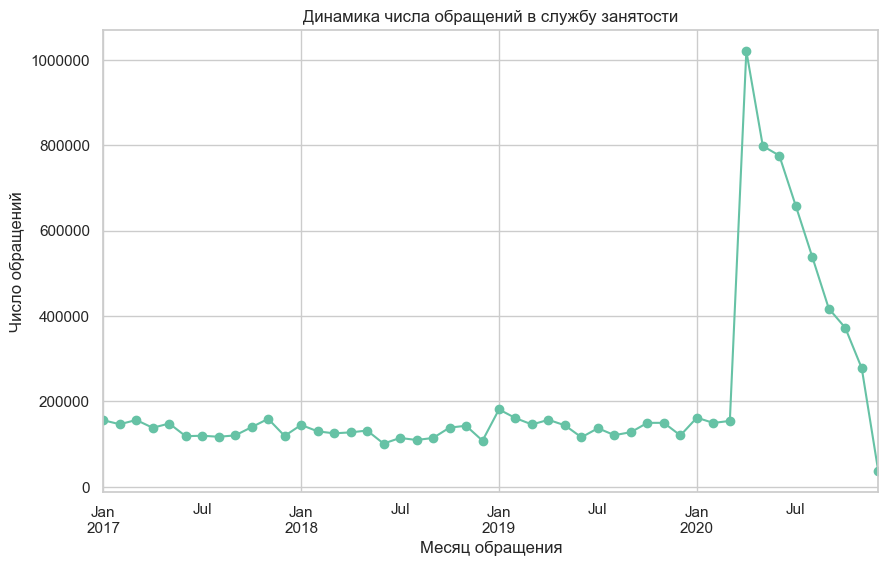

In [64]:
# Соответственно, покажу динамику на графике
plt.ticklabel_format(style='plain')
dynamics.plot(title='Динамика числа обращений в службу занятости',
               style='o-',
               grid=True,
               figsize=(10, 6),
               ylabel='Число обращений',
               xlabel='Месяц обращения')

plt.show()

In [65]:
# проделаем то же по годам
dynamics_1 = df.groupby('year')['count'].sum()

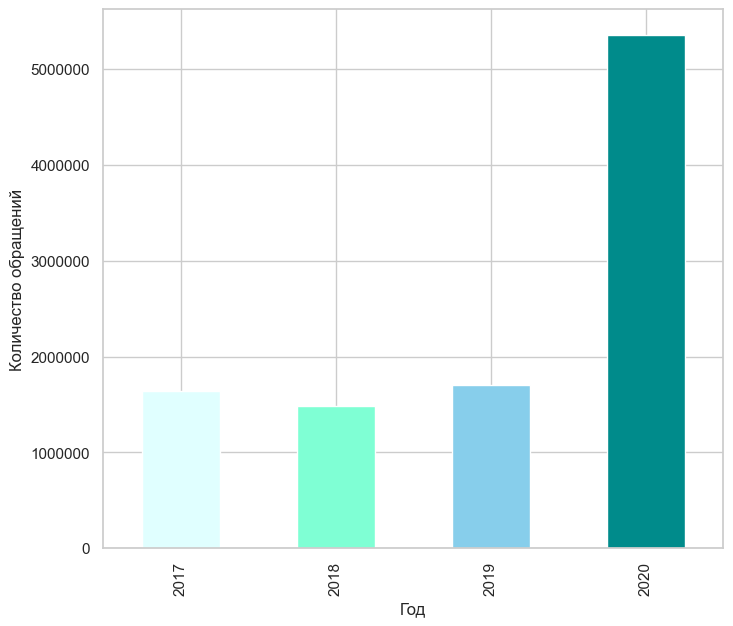

In [66]:
plt.ticklabel_format(style='plain')
dynamics_1.plot(kind='bar',
                xlabel='Год',
                ylabel='Количество обращений',
                legend=False,
                color = ['lightcyan', 'aquamarine', 'skyblue', 'darkcyan'])
plt.show()

<font color='slategrey'>Такое большое количество обращений в службу занятости в 2020м году, скорее всего, связано с пандемией, увольнением и сокращением рабочих мест, что побудило граждан к получению пособий по безработице или других видов финансовой поддержки. </font>

In [67]:
# изучим динамику числа повторных обращений по годам
dynamics_2 = pd.merge(dynamics_1,
                      df[df['hc_repeat'] == True].groupby('year')['count'].sum(),
                      right_index = True,
                      left_index = True)
dynamics_2.columns=['Количество обращений', 'Количество повторных обращений']
dynamics_2

,Количество обращений,Количество повторных обращений
year,,
2017,1636952,860704
2018,1486267,796278
2019,1708624,912458
2020,5358371,1945860


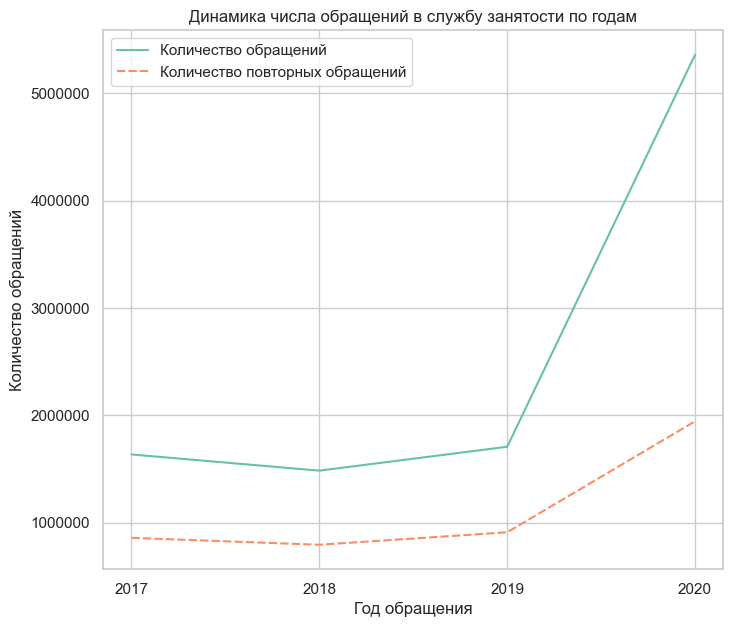

In [68]:
import numpy as np

plt.ticklabel_format(style='plain')
sns.lineplot(data=dynamics_2).set(title='Динамика числа обращений в службу занятости по годам',
                                  xlabel='Год обращения',
                                  ylabel='Количество обращений')
plt.xticks(np.arange(2017, 2021, step=1))
plt.show()

<font color='slategrey'>В целом многие обращались первично, поэтому мы не наблюдаем такого же скачка в значениях повторных обращений. Однако рекордное количество повторных обращений в 2020-м году составляет 1945860. 
</font>


### <font color='slategrey'>2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.</font>

In [69]:
group_age = df.groupby('age')['count'].sum()
group_age.head()

age
16-21     642896
22-27    1314198
28-33    2001623
34-39    1963618
40-45    1580492
Name: count, dtype: int64

<font color='slategrey'>Можем заметить, что в основном в службу занятости обращалась молодежь 28-33 лет</font>

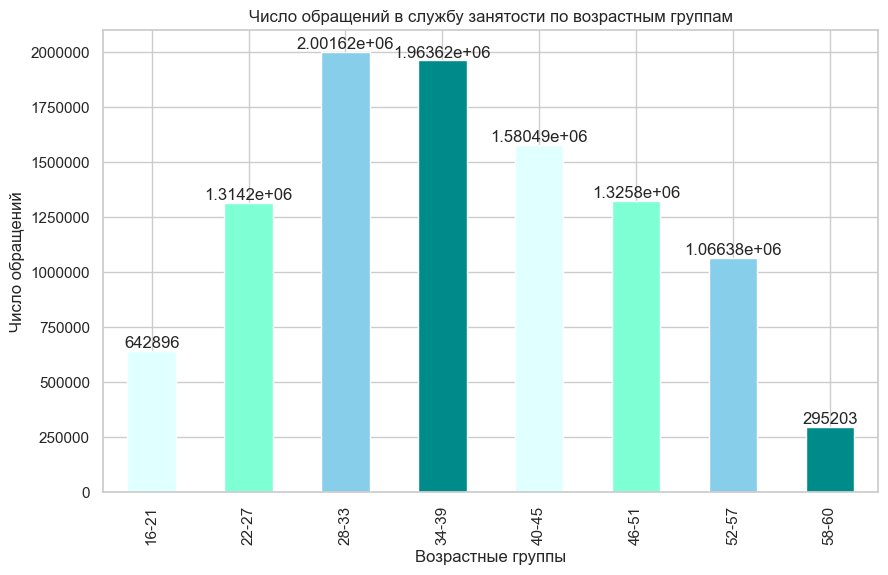

In [70]:
plt.ticklabel_format(style='plain')

ax = group_age.plot(kind='bar',
               title='Число обращений в службу занятости по возрастным группам',
               legend=False,
               figsize=(10, 6),
               xlabel='Возрастные группы',
               ylabel='Число обращений',
               grid=True,
               color = ['lightcyan', 'aquamarine', 'skyblue', 'darkcyan']
              )
ax.bar_label(ax.containers[0])
plt.show()

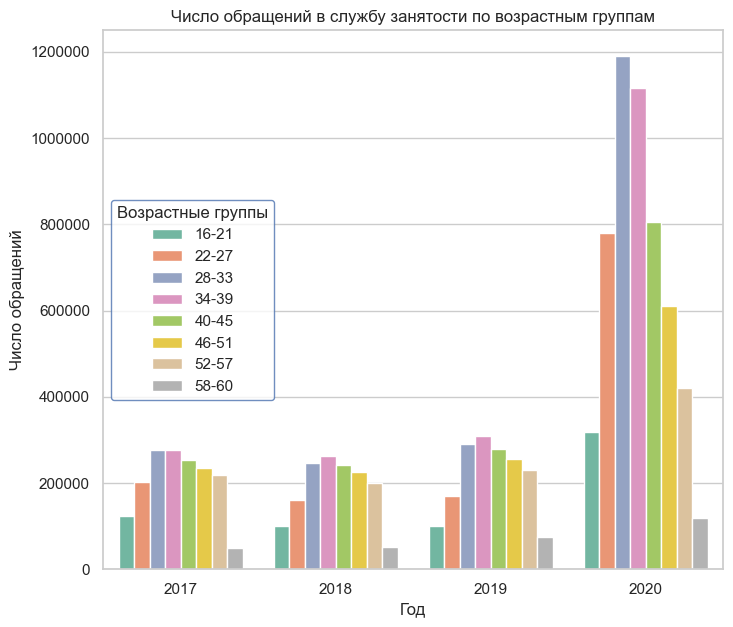

In [71]:
plt.ticklabel_format(style='plain')
# теперь посмотрим на соотношение обращений в возрастных группах в разных годах
group_age_1 = df.groupby(['age', 'year'])['count'].sum().reset_index()
sns.barplot(data=group_age_1,
            x='year',
            y='count',
            hue='age').set(title = 'Число обращений в службу занятости по возрастным группам', xlabel='Год', ylabel='Число обращений')
plt.legend(loc='center left', title='Возрастные группы', edgecolor='b')
plt.show()

<font color='slategrey'><b>Выводы </font>

<font color='slategrey'>До детализации по годам можно было сделать вывод, что больше всего в службы занятости обращались возрастные группы 28-33 и 34-39 лет. </font>
    
<font color='slategrey'>Однако детализация помогла сделать вывод, что хотя в 2020-м году количество обращений увеличилось во всех возрастных группах, особенно возросло число обращений возрастных групп 28-33 и 34-39 лет. Хотя раньше все группы были примерно на одном уровне</font>

### <font color='slategrey'>3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.</font>

In [72]:
# Определим общее число устроившихся на работу граждан
employed = df.pivot_table(index=['find_new_job', 'year'],
                          aggfunc='sum',
                          values='count',
                          ).rename(index={False: 'Безработные', True: 'Трудоустроившиеся'}).reset_index()

employed

,find_new_job,year,count
0,Безработные,2017,761183
1,Безработные,2018,696596
2,Безработные,2019,894743
3,Безработные,2020,4261023
4,Трудоустроившиеся,2017,875769
5,Трудоустроившиеся,2018,789671
6,Трудоустроившиеся,2019,813881
7,Трудоустроившиеся,2020,1097348


In [73]:
# Теперь посмотрим на долю 
employ_perc = round(sum(employed.loc[4:, 'count']) / df['count'].sum() * 100, 2)
print(f'Процент трудоустроившихся: {employ_perc}%')

Процент трудоустроившихся: 35.1%


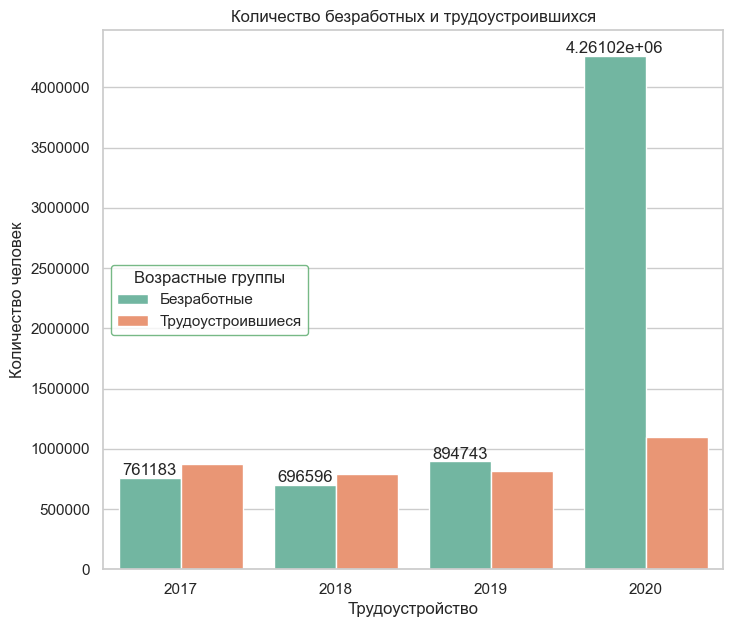

In [74]:
plt.ticklabel_format(style='plain')

ax = sns.barplot(data=employed, x='year', y='count', hue='find_new_job')
plt.title('Количество безработных и трудоустроившихся')
plt.xlabel('Трудоустройство')
plt.ylabel('Количество человек')
ax.bar_label(ax.containers[0])
plt.legend(loc='center left', title='Возрастные группы', edgecolor='g')
plt.rcParams['figure.figsize'] = (12, 9)
plt.show()


<font color='slategrey'>В 2020-м году сильно возросло количество безработных, в сравнении с примерно одинаковым уровнем в предыдущих годах.  </font>

<font color='slategrey'>Количество трудоустроившихся увеличилось незначительно по сравнению с этим изменением. </font>

### 
### <font color='slategrey'>4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.</font>

In [82]:
# Взглянем на абсолютно значение соотношения трудоустройства по годам
employed_in_a_year = df[df['find_new_job'] == True].groupby('year')['count'].sum().reset_index()
employed_in_a_year

,year,count
0,2017,875769
1,2018,789671
2,2019,813881
3,2020,1097348


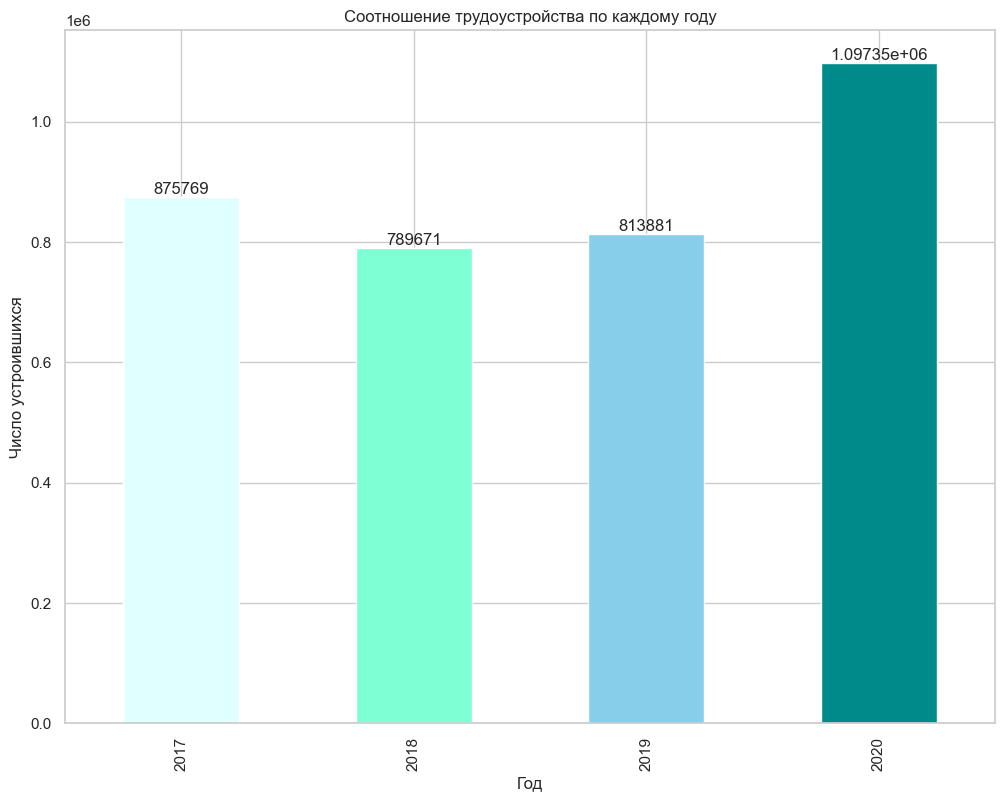

In [83]:
ax = employed_in_a_year.plot(kind='bar',
                             x='year',
                             y='count',
                             title='Соотношение трудоустройства по каждому году',
                             legend=False,
                             xlabel='Год',
                             ylabel='Число устроившихся',
                             color = ['lightcyan', 'aquamarine', 'skyblue', 'darkcyan']
                            )
ax.bar_label(ax.containers[0])
plt.show()

### 
### <font color='slategrey'>4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.</font>

In [85]:
all_employed = df.groupby('year')['count'].sum().reset_index()
employed_in_a_year['perc'] = round(employed_in_a_year['count'] / all_employed['count'] * 100, 2)
employed_in_a_year

,year,count,perc
0,2017,875769,53.50
1,2018,789671,53.13
2,2019,813881,47.63
3,2020,1097348,20.48


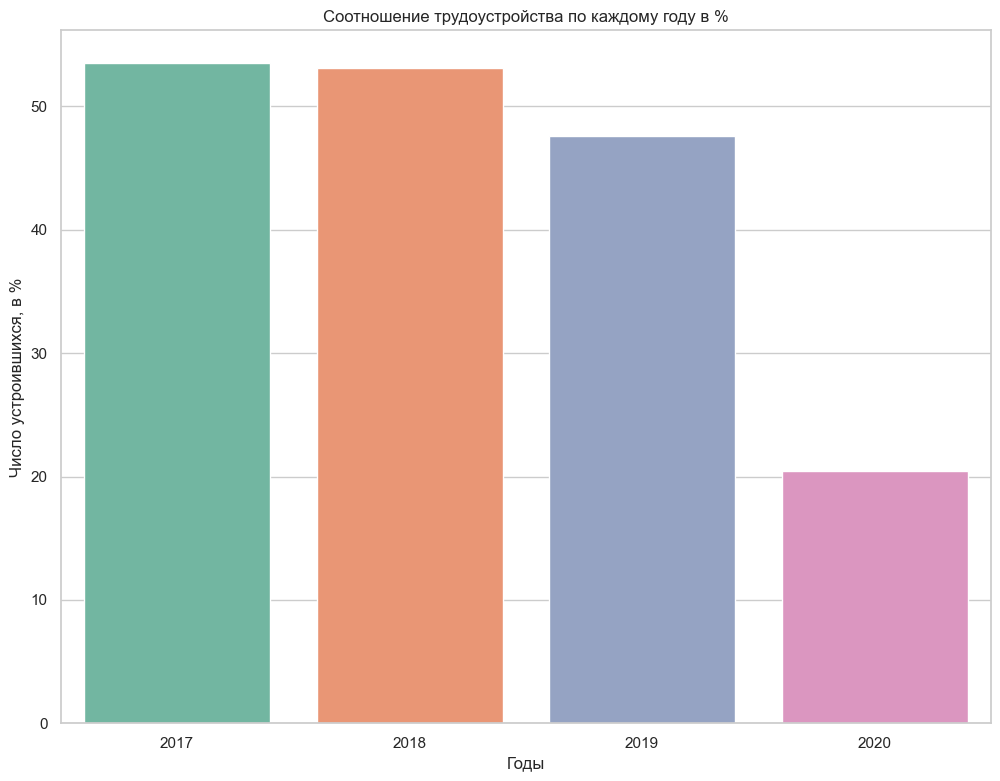

In [86]:
sns.barplot(data=employed_in_a_year, x='year', y='perc')
plt.xlabel('Годы')
plt.ylabel('Число устроившихся, в %')
plt.title('Соотношение трудоустройства по каждому году в %')
plt.bar_label(ax.containers[0])
plt.show()

<font color='slategrey'> <b> Выводы:  </font>

<font color='slategrey'>1. Несмотря на то, что количество трудоустроившихся заметно увеличилось в 2020-м году(1 097 348), количество безработных увеличилось более значительно. </font>

<font color='slategrey'>2. Поэтому доля трудоспособных значительно снизилась: 2019-м году она составляла 47,6%, а в 2020-м году — 20,5%.</font>

   ### <font color='slategrey'>5. Осуществите категоризацию по столбцам gender и education в соответствии с исходными данными. </font>
   #### <font color='slategrey'>Определите с каким образованием в службу занятости обращаются граждане, ранее официально не работавшие.</font>
   #### <font color='slategrey'>Определите соотношение трудоустройства по каждому уровню образования.</font>

    

In [87]:
# Вместо 0 я поставила None, так как отсутствие данных в датафрейме — None
dict_edu = {'1' : 'начальное общее образование',
            '2' : 'основное общее образование',
            '3' : 'среднее общее образование',
            '4' : 'среднее профессиональное образование',
            '6' : 'высшее образование',
            '9' : 'другое',
            'None' : 'нет данных'
            }
df['education'] = df['education'].map(dict_edu) 

In [88]:
# Аналогично операцию проведем с полом
dict_gender = {'1' : 'мужской',
               '0' : 'женский',
               'None': 'нет данных'
              }
df['gender'] = df['gender'].map(dict_gender) 

In [89]:
# В целом количество людей, получивших образование:
edu = df.pivot_table(index='education',
                     aggfunc='sum',
                     values='count').reset_index().sort_values(by='count', ascending=False)
edu

,education,count
6,среднее профессиональное образование,2555969
5,среднее общее образование,2174288
3,нет данных,2138103
0,высшее образование,1561037
4,основное общее образование,1431099
1,другое,321852
2,начальное общее образование,7866


In [90]:
# теперь посмотрим на количество людей без опыта!
no_exp = df[df['hc_didnotwork'] == True].pivot_table(index='education',
                                                     aggfunc='sum',
                                                     values='count',
                                                    ).reset_index().sort_values(by='count', ascending=False)
no_exp

,education,count
5,среднее общее образование,540559
4,основное общее образование,387410
6,среднее профессиональное образование,356212
0,высшее образование,144917
1,другое,120817
3,нет данных,84118
2,начальное общее образование,1556


<font color='slategrey'>Так, ранее официально не работавшие граждане в службу занятости в основном обращаются после окончания среднего общего и основного общего образования.</font>

In [91]:
# Определим соотношение трудоустройства по каждому уровню образования
employed_edu = df[df['find_new_job'] == True].pivot_table(index='education',
                                                          aggfunc='sum',
                                                          values='count').reset_index().sort_values(by='count', ascending=False)
employed_edu

,education,count
6,среднее профессиональное образование,1025953
3,нет данных,717325
0,высшее образование,674240
5,среднее общее образование,640822
4,основное общее образование,440462
1,другое,75815
2,начальное общее образование,2052


In [92]:
# взглянем на относительное соотношение трудоустройства по уровню образования:
edu_perc = employed_edu.copy()
edu_perc['perc'] = round(employed_edu['count'] / edu['count'] * 100, 2)

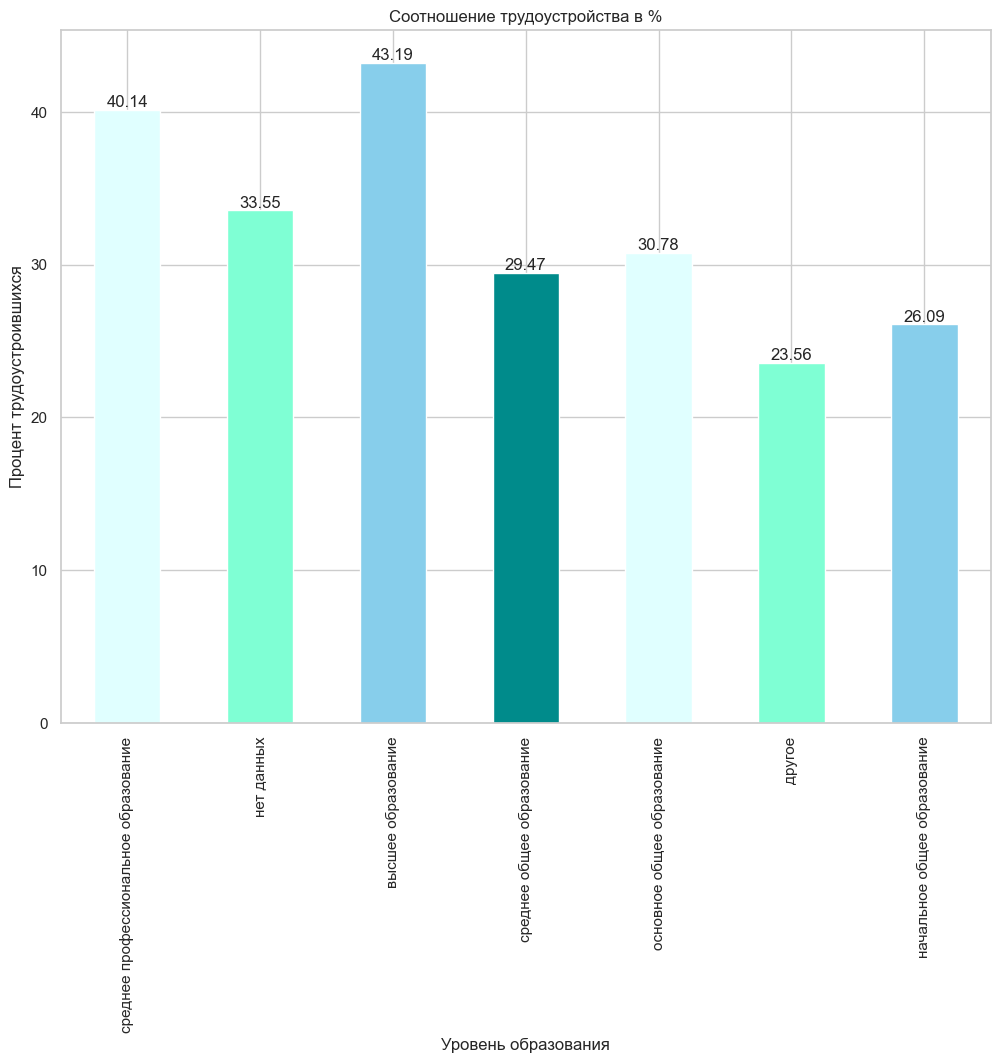

In [93]:
ax = edu_perc.plot(kind='bar',
                   x='education',
                   y='perc',
                   title='Соотношение трудоустройства в %',
                   legend=False,
                   xlabel='Уровень образования',
                   ylabel='Процент трудоустроившихся',
                   color = ['lightcyan', 'aquamarine', 'skyblue', 'darkcyan']
                   )
ax.bar_label(ax.containers[0])
plt.show()

<font color='slategrey'>Так, трудоустроили по большей части, все-таки, обладателей высшего образования и среднего профессионального образования.</font>

### 
### <font color='slategrey'>6. Исследуйте безработицу в России отдельно за 2020 год (за исключением декабря 2020!). Создайте срез данных.</font>

In [95]:
df_1 = df.query('month_application >= "2020-01-01" and month_application < "2020-12-01"')
df_1.head(3)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year
1382,40299,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,28-33,женский,среднее профессиональное образование,True,False,True,2,1,2020
1383,41202,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,52-57,мужской,высшее образование,True,False,False,1,1,2020
1384,41210,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,58-60,мужской,основное общее образование,True,False,False,2,1,2020


### <font color='slategrey'> 6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам</font>

In [96]:
df_2 = df_1[df_1['find_new_job'] == True].pivot_table(index='month',
                                                      aggfunc='sum',
                                                      values='count',
                                                      ).reset_index()
months = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь'}
df_2['month'] = df_2['month'].map(months)

df_2['didnt_find'] = df_1.pivot_table(index='month', aggfunc='sum', values='count').reset_index()['count'] - df_2['count']
df_2

,month,count,didnt_find
0,Январь,63615,98098
1,Февраль,53040,96326
2,Март,49817,104349
3,Апрель,299564,720765
4,Май,220721,577112
5,Июнь,153530,622049
6,Июль,112190,545431
7,Август,73088,465067
8,Сентябрь,43106,374197
9,Октябрь,22461,349703


<AxesSubplot:xlabel='month'>

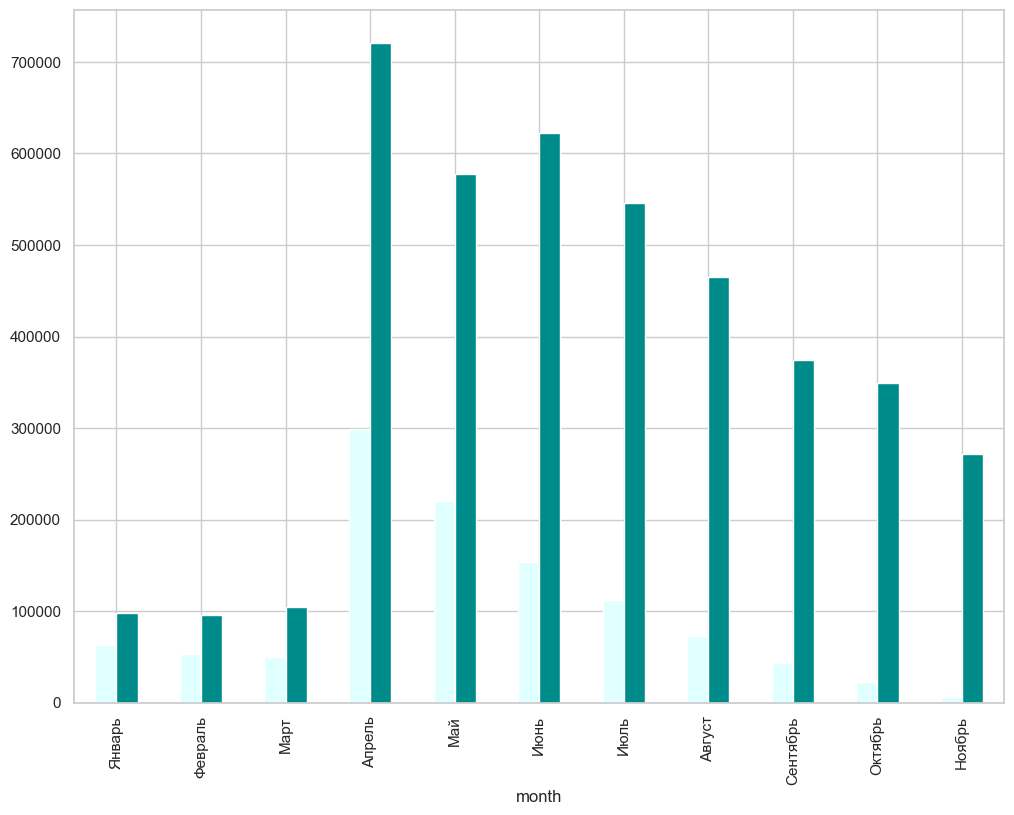

In [97]:
df_2.plot(kind='bar',
          x='month',
          y=['count', 'didnt_find'],
          color = ['lightcyan', 'darkcyan'],
          legend=False
         )

### <font color='slategrey'> 6.2 Определите процент трудоустройства по гендерной принадлежности</font>

In [98]:
# в целом посмотрим на количество трудоустроившихся в зависимости от пола
employed_gender_20 = df_1[df_1['find_new_job'] == True].pivot_table(index='gender',
                                                                     aggfunc='sum',
                                                                     values='count',
                                                                     ).reset_index()
employed_gender_20

,gender,count
0,женский,604532
1,мужской,492607
2,нет данных,1


In [99]:
# в целом количество безработных и трудоустроившихся в 2020-м
gender_20 = df_1.pivot_table(index='gender',
                             aggfunc='sum',
                             values='count',
                             ).reset_index()
gender_20

,gender,count
0,женский,3052513
1,мужской,2269142
2,нет данных,5


In [100]:
employed_gender_20['perc'] = round(employed_gender_20['count'] / gender_20['count'] * 100, 2) 
employed_gender_20

,gender,count,perc
0,женский,604532,19.80
1,мужской,492607,21.71
2,нет данных,1,20.00


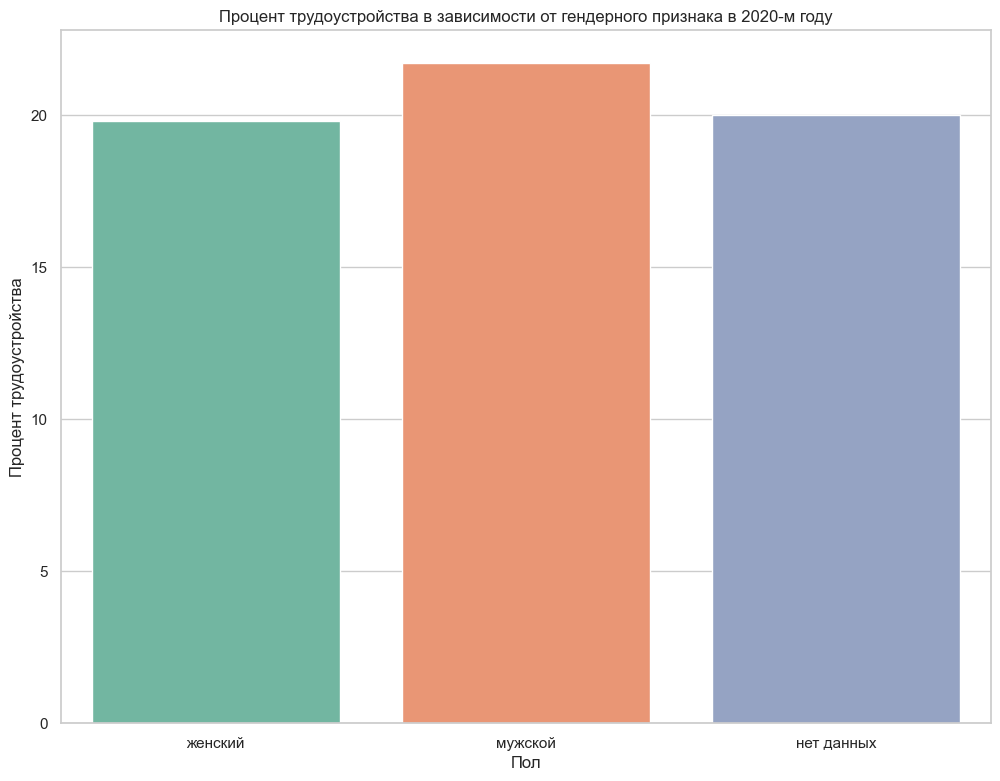

In [101]:
sns.barplot(data=employed_gender_20, x='gender', y='perc')
plt.title('Процент трудоустройства в зависимости от гендерного признака в 2020-м году')
plt.xlabel('Пол')
plt.ylabel('Процент трудоустройства')
plt.rcParams['figure.figsize'] = (7, 5)

<font color='slategrey'>Забавный факт, что процент по трудоустройству у тех, у кого нет данных о гендерном признаке, больше, чем у женщин. В целом по этому показателю лидируют мужчины, так сложилось исторически)</font>

### <font color='slategrey'> 6.3 Определите число обращений в службу занятости по федеральным округам.</font>

In [102]:
district_refers = df_1.groupby('district')['count'].sum().reset_index().sort_values(by='count')
district_refers

,district,count
0,Дальневосточный федеральный округ,289224
5,Уральский федеральный округ,461223
2,Северо-Западный федеральный округ,477798
7,Южный федеральный округ,595894
3,Северо-Кавказский федеральный округ,701329
4,Сибирский федеральный округ,718075
6,Центральный федеральный округ,1029581
1,Приволжский федеральный округ,1048536



### <font color='slategrey'> 6.4 Определите разброс числа объявлений по регионам с помощью boxplot.</font>

In [103]:
reg_refers = df_1.groupby('region')['count'].sum().reset_index()
reg_refers.head()

,region,count
0,Алтайский край,63741
1,Амурская область,30967
2,Архангельская область,42056
3,Астраханская область,56176
4,Белгородская область,29259


<AxesSubplot:>

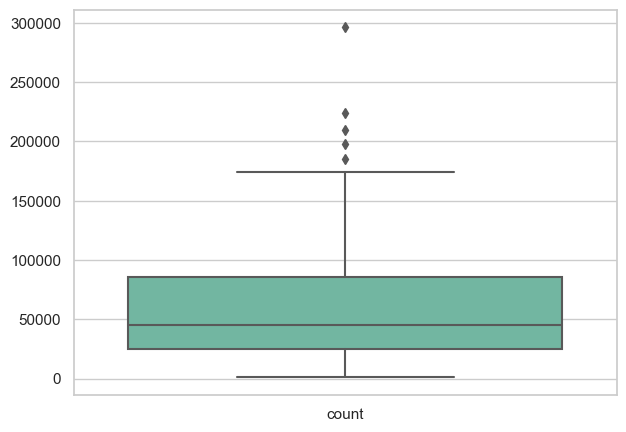

In [104]:
sns.boxplot(data=reg_refers)

In [105]:
reg_refers.describe()

,count
count,85.000000
mean,62607.764706
std,57417.455240
min,1227.000000
25%,24901.000000
50%,45430.000000
75%,85686.000000
max,296258.000000


<font color='slategrey'> Межквартильный размах находится примерно между 25 тыс. и 80 тыс. обращений. Среднее значение числа объявление по регионам составляет 62607,7 случаев.</font>

<font color='slategrey'> За пределами усов ящика с усами находятся выбросы, причем один располагается на более значительном расстоянии, значение которого  составляет почти 300 тыс.</font>

### <font color='slategrey'> 6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.</font>

In [106]:
sz = df_1[df_1['district'] == 'Северо-Западный федеральный округ'].pivot_table(index='region', aggfunc='sum', values='count').reset_index().sort_values(by='count', ascending=False)
sz

,region,count
10,г. Санкт-Петербург,156668
2,Калининградская область,52451
1,Вологодская область,50283
3,Ленинградская область,49637
0,Архангельская область,42056
9,Республика Коми,36318
8,Республика Карелия,27755
4,Мурманская область,23166
6,Новгородская область,20088
7,Псковская область,17499


### <font color='slategrey'>***6.6 Определите процент трудоустройства по федеральным округам.</font>

In [107]:
# Для начала посмотрим в целом количество трудоустроившихся
empl_distr = df_1[df['find_new_job']].pivot_table(index='district', aggfunc='sum', values='count').reset_index()
empl_distr

C:\Users\Рушана\AppData\Local\Temp\ipykernel_15116\3852019737.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empl_distr = df_1[df['find_new_job']].pivot_table(index='district', aggfunc='sum', values='count').reset_index()


,district,count
0,Дальневосточный федеральный округ,54219
1,Приволжский федеральный округ,251729
2,Северо-Западный федеральный округ,105280
3,Северо-Кавказский федеральный округ,40359
4,Сибирский федеральный округ,182080
5,Уральский федеральный округ,92800
6,Центральный федеральный округ,261956
7,Южный федеральный округ,108717


In [108]:
# определим экономически активное население(безработные + трудоустроившиеся) по округам
empl_unempl_distr = df_1.pivot_table(index='district', aggfunc='sum', values='count').reset_index()

# ну а теперь посмотрим соотношение
empl_distr['perc'] = round(empl_distr['count'] / empl_unempl_distr['count'] * 100, 2)
empl_distr

,district,count,perc
0,Дальневосточный федеральный округ,54219,18.75
1,Приволжский федеральный округ,251729,24.01
2,Северо-Западный федеральный округ,105280,22.03
3,Северо-Кавказский федеральный округ,40359,5.75
4,Сибирский федеральный округ,182080,25.36
5,Уральский федеральный округ,92800,20.12
6,Центральный федеральный округ,261956,25.44
7,Южный федеральный округ,108717,18.24


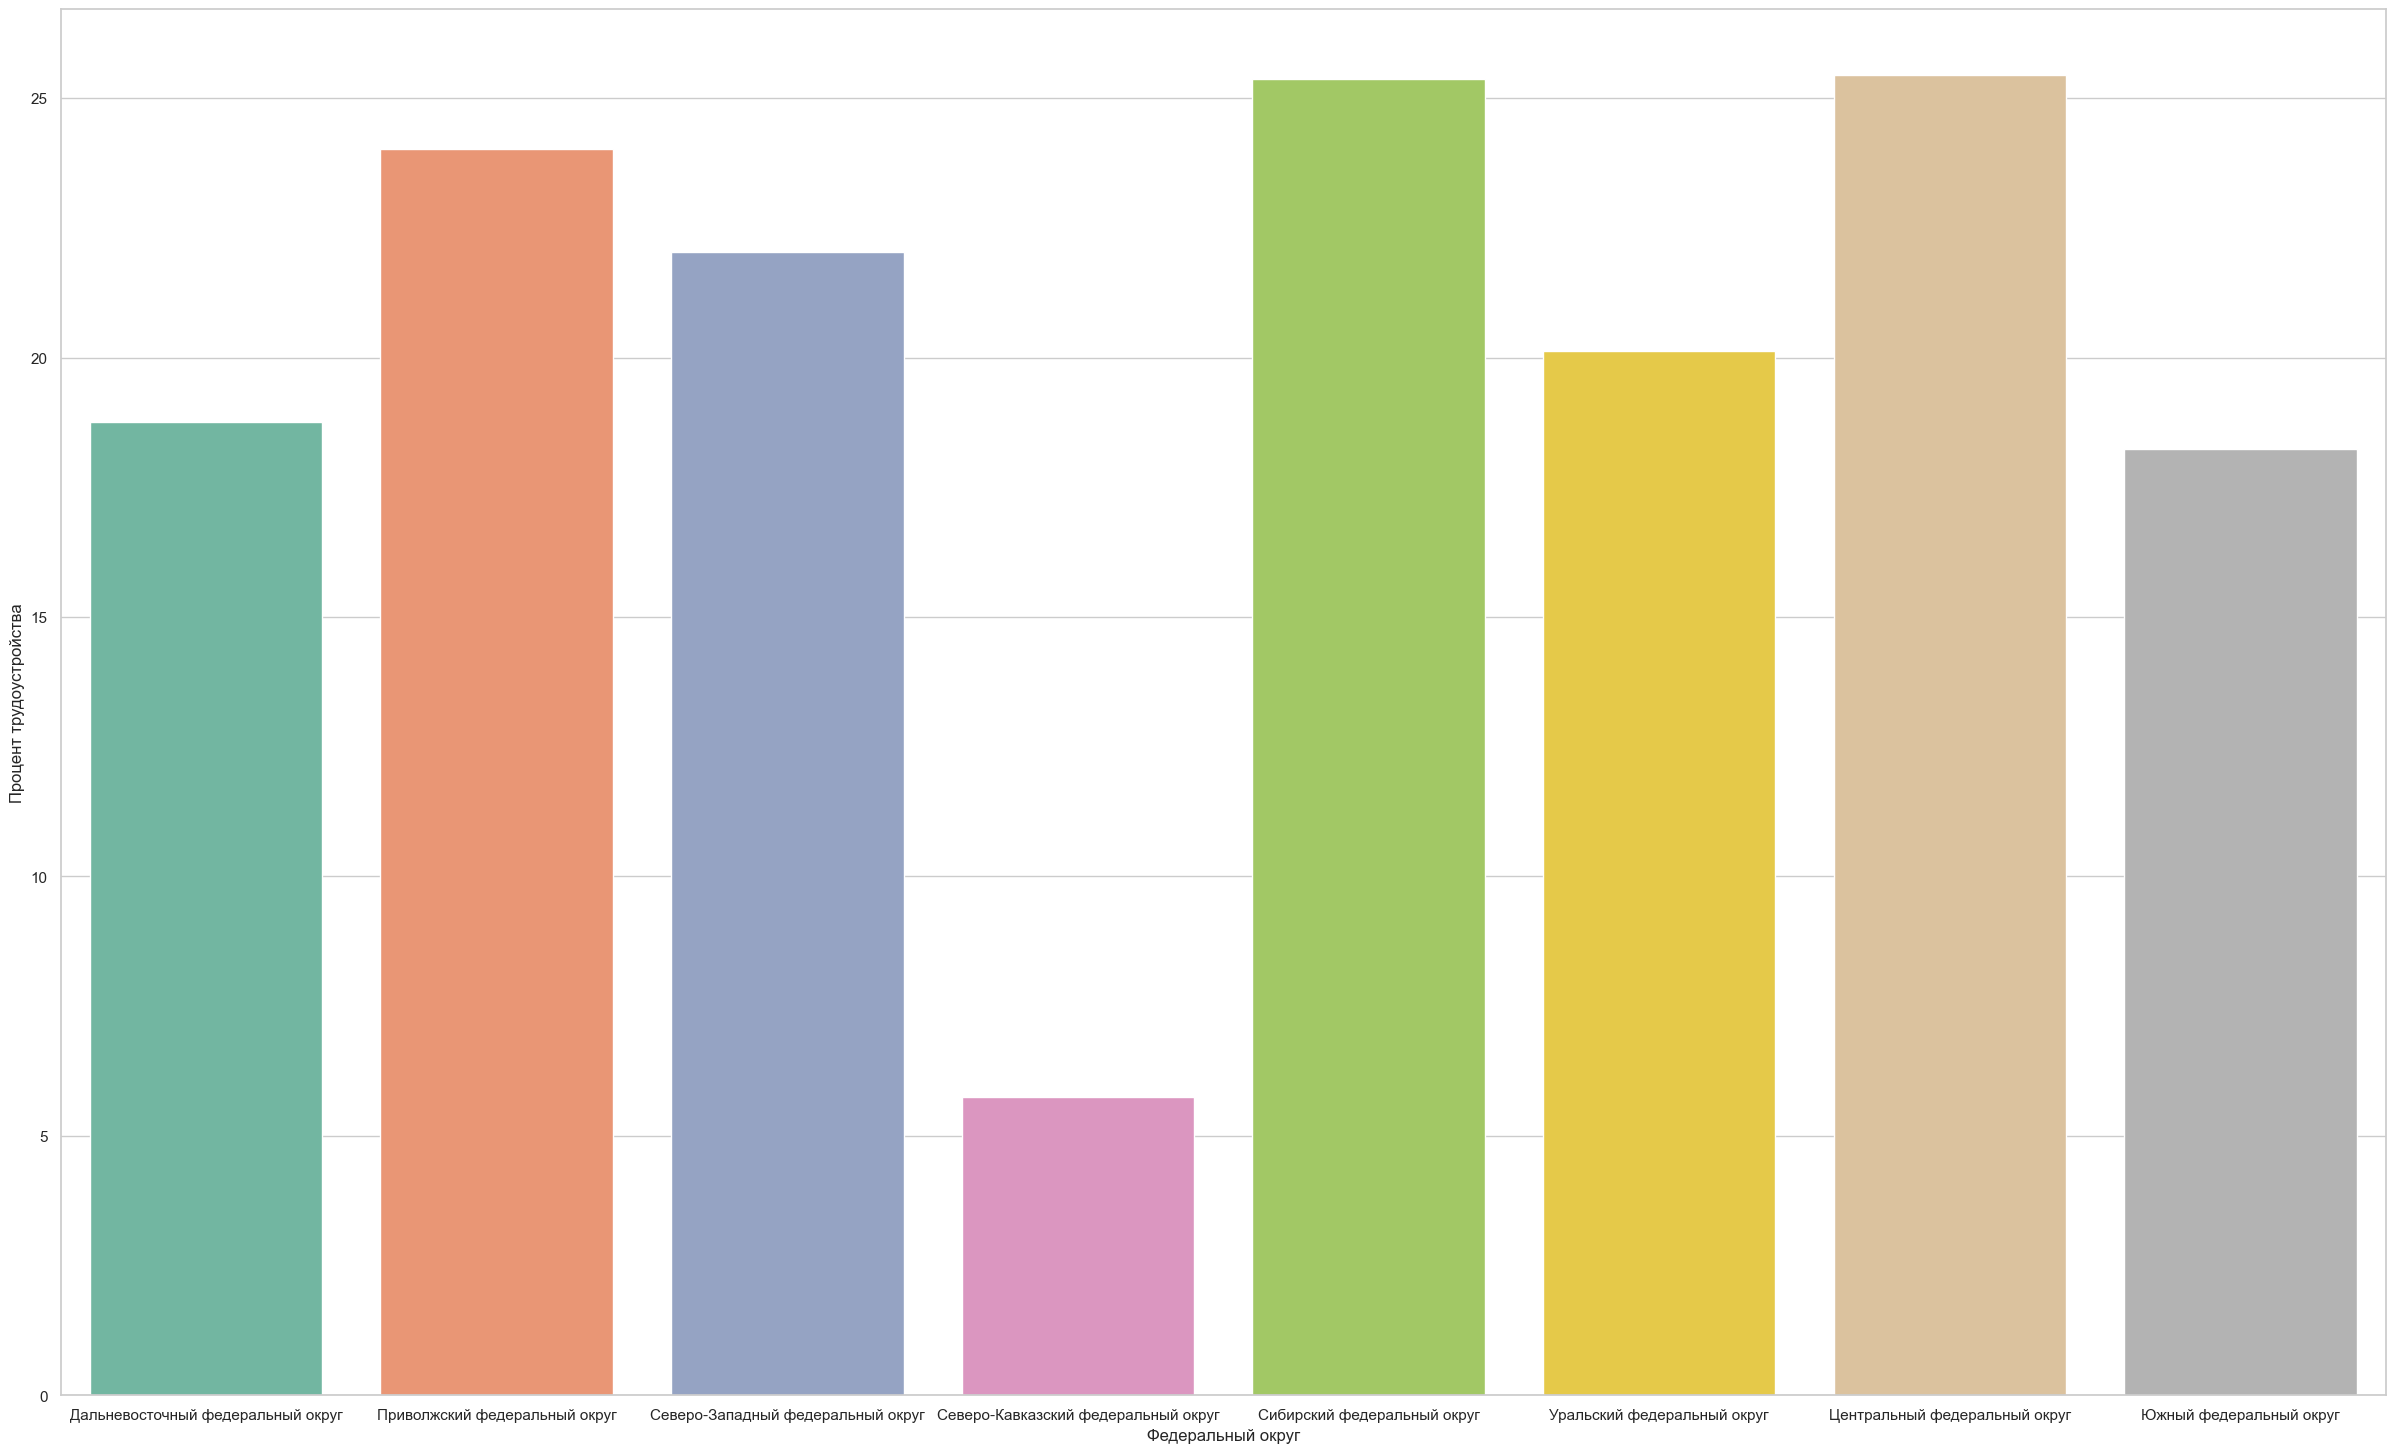

In [119]:
sns.barplot(data=empl_distr, x='district', y='perc')
plt.xlabel('Федеральный округ')
plt.ylabel('Процент трудоустройства')
plt.rcParams['figure.figsize'] = (30, 18)
plt.show()

<font color='slategrey'> По диаграмме видно, что в основном работу нашли в Центральном федеральном округе(25,4%), Сибирском федеральном округе(26,4%) и ПРиволжском федеральном округе(24%)</font>

### <font color='slategrey'>***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле</font>

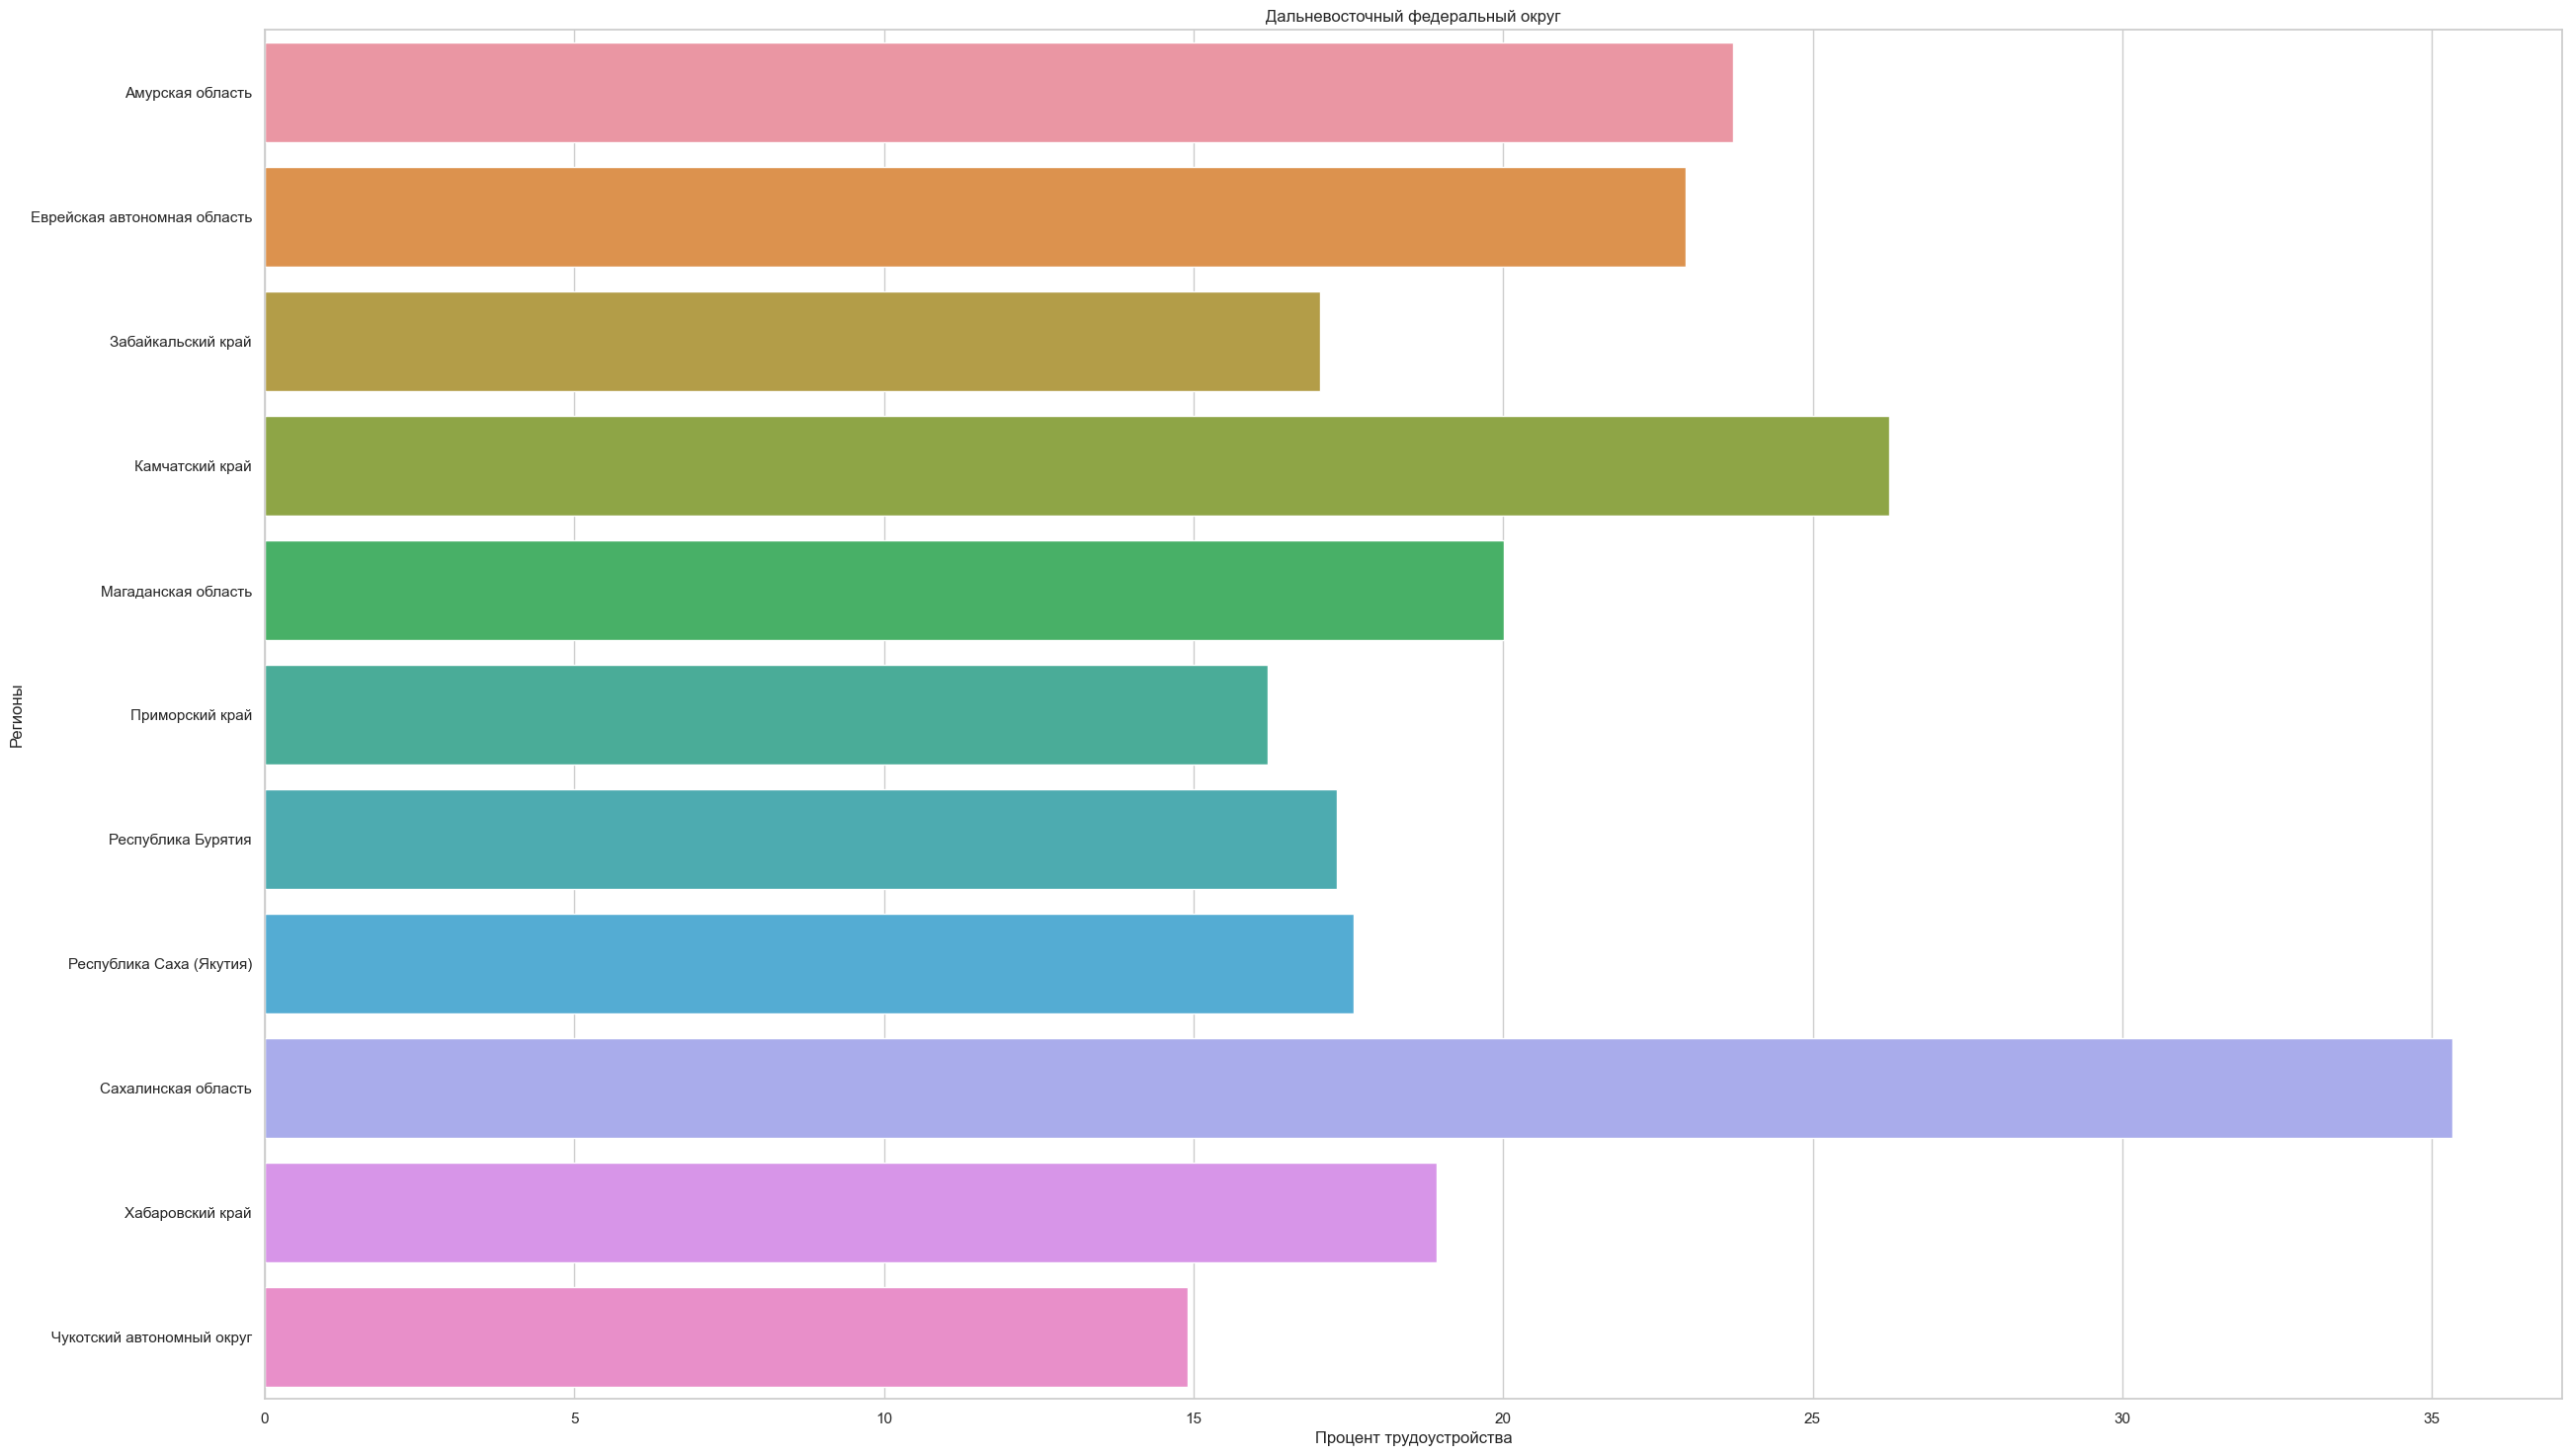

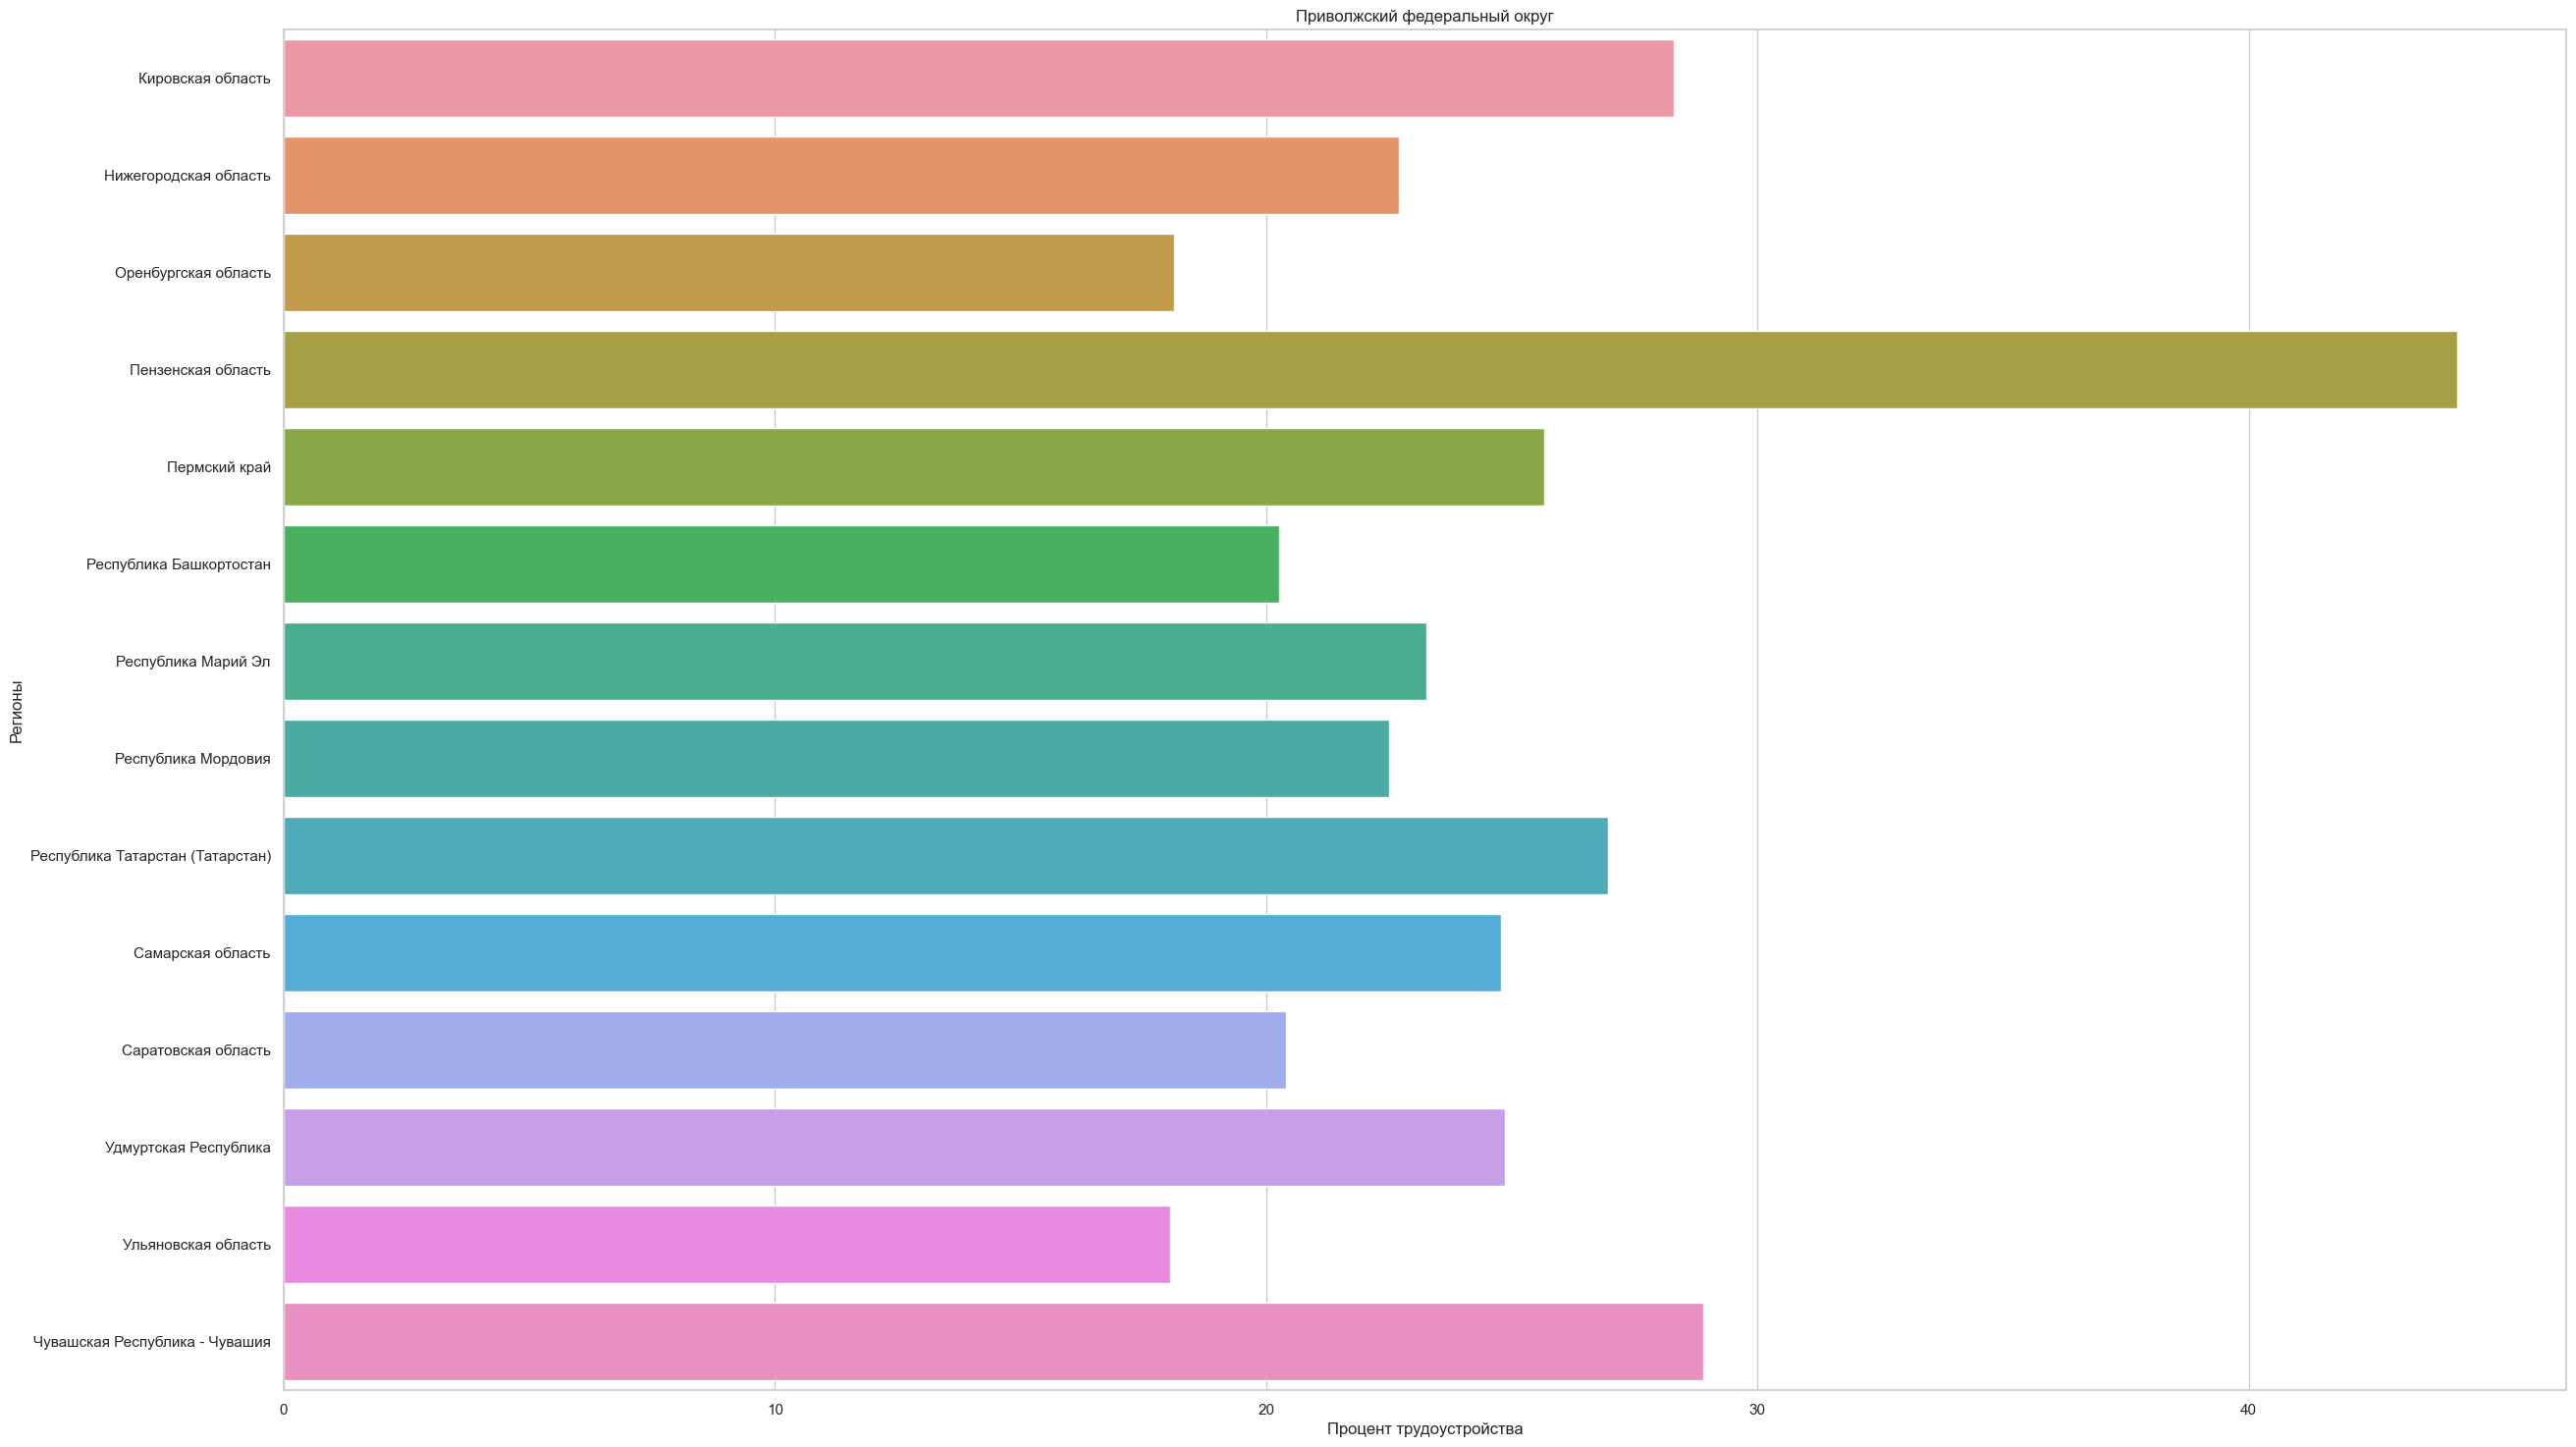

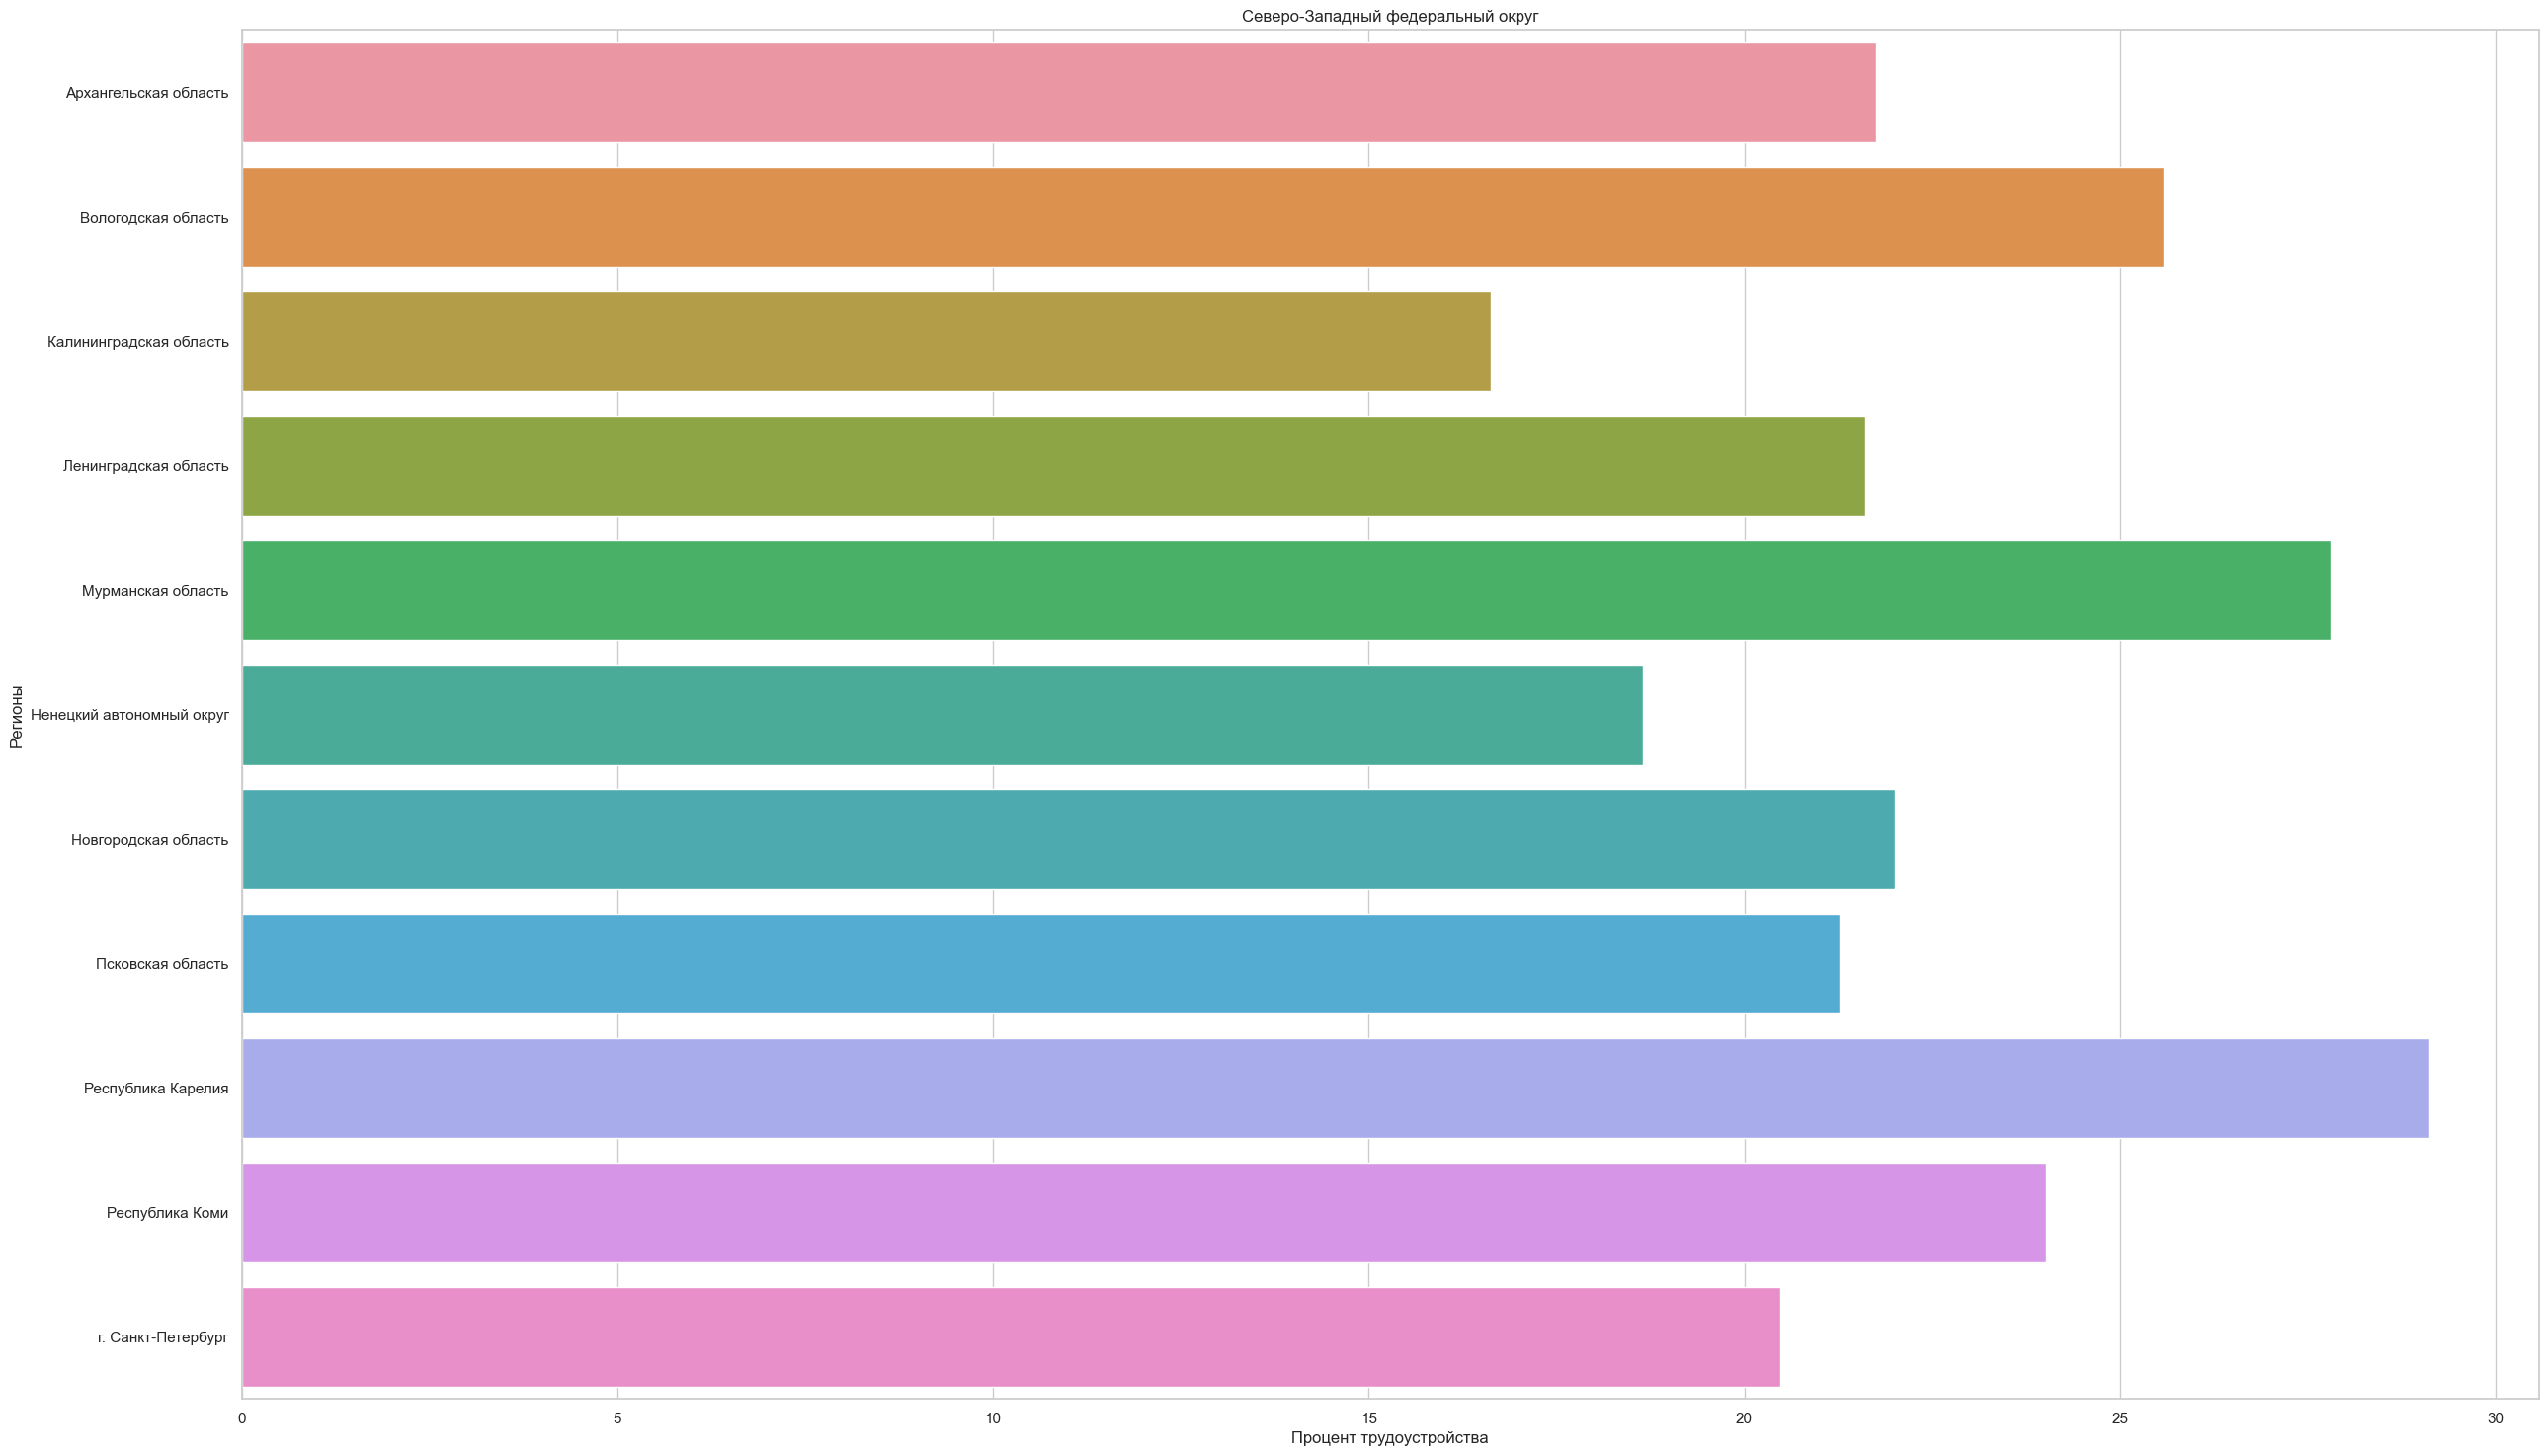

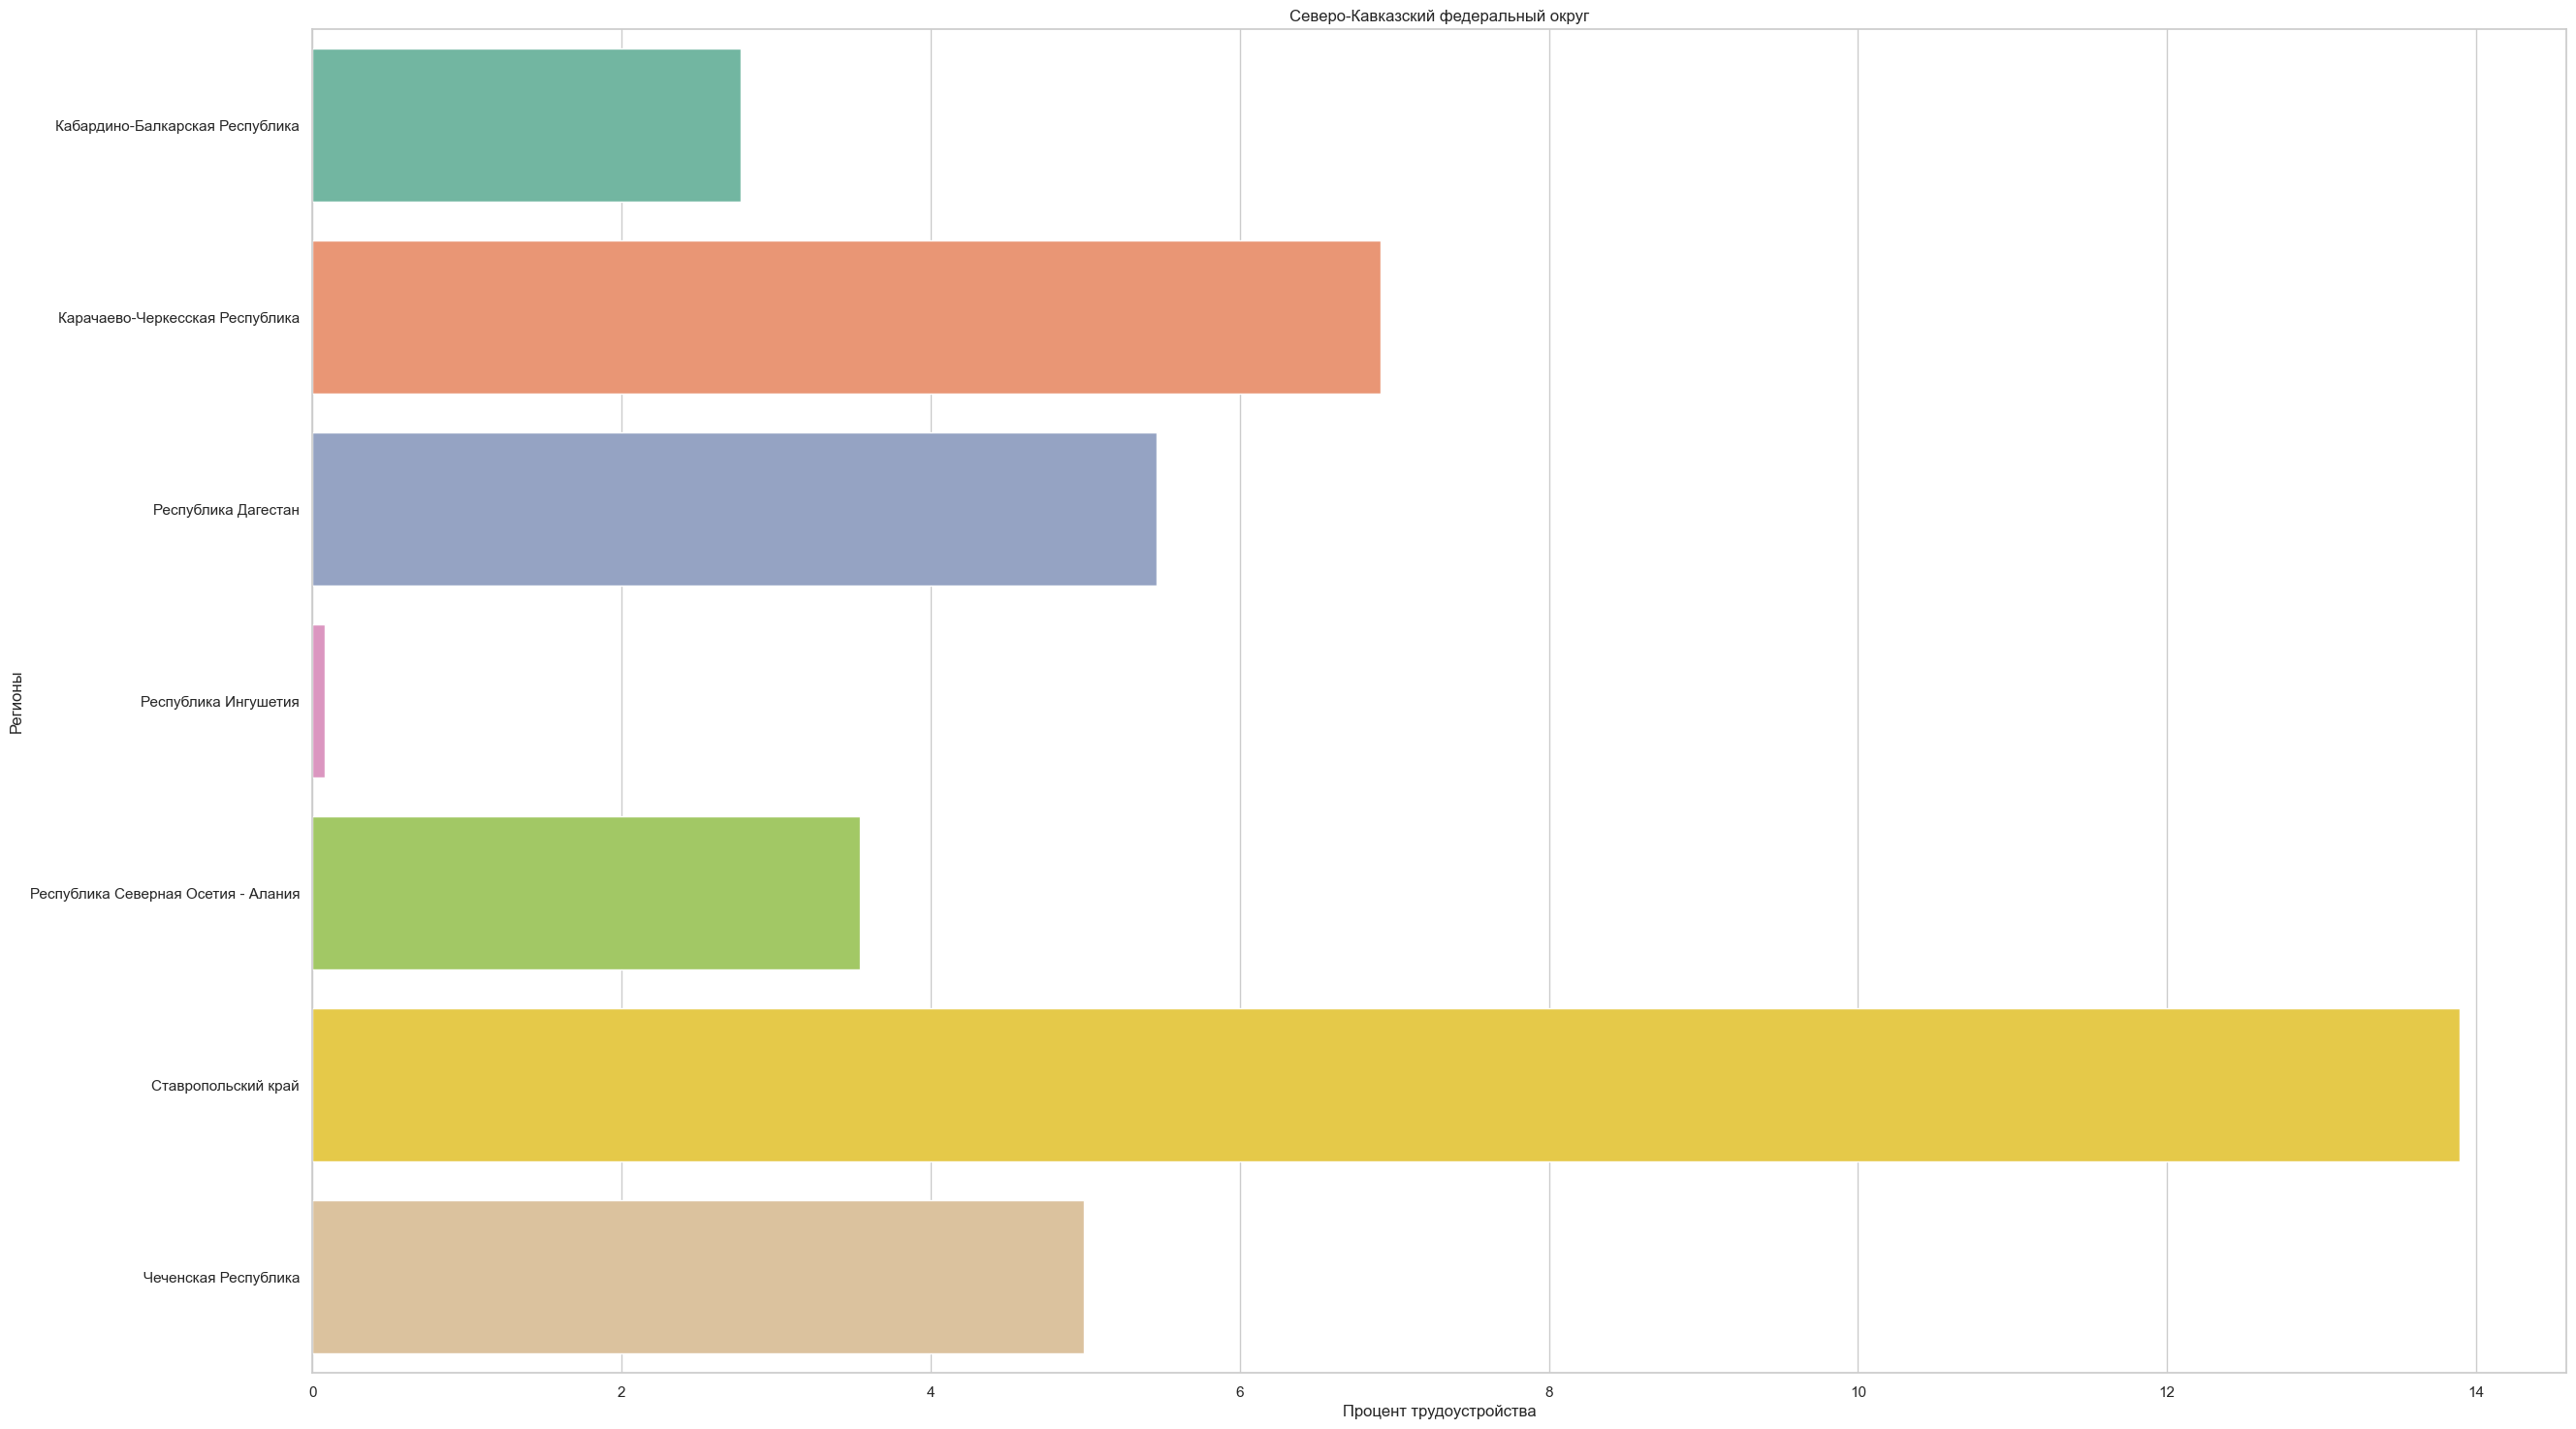

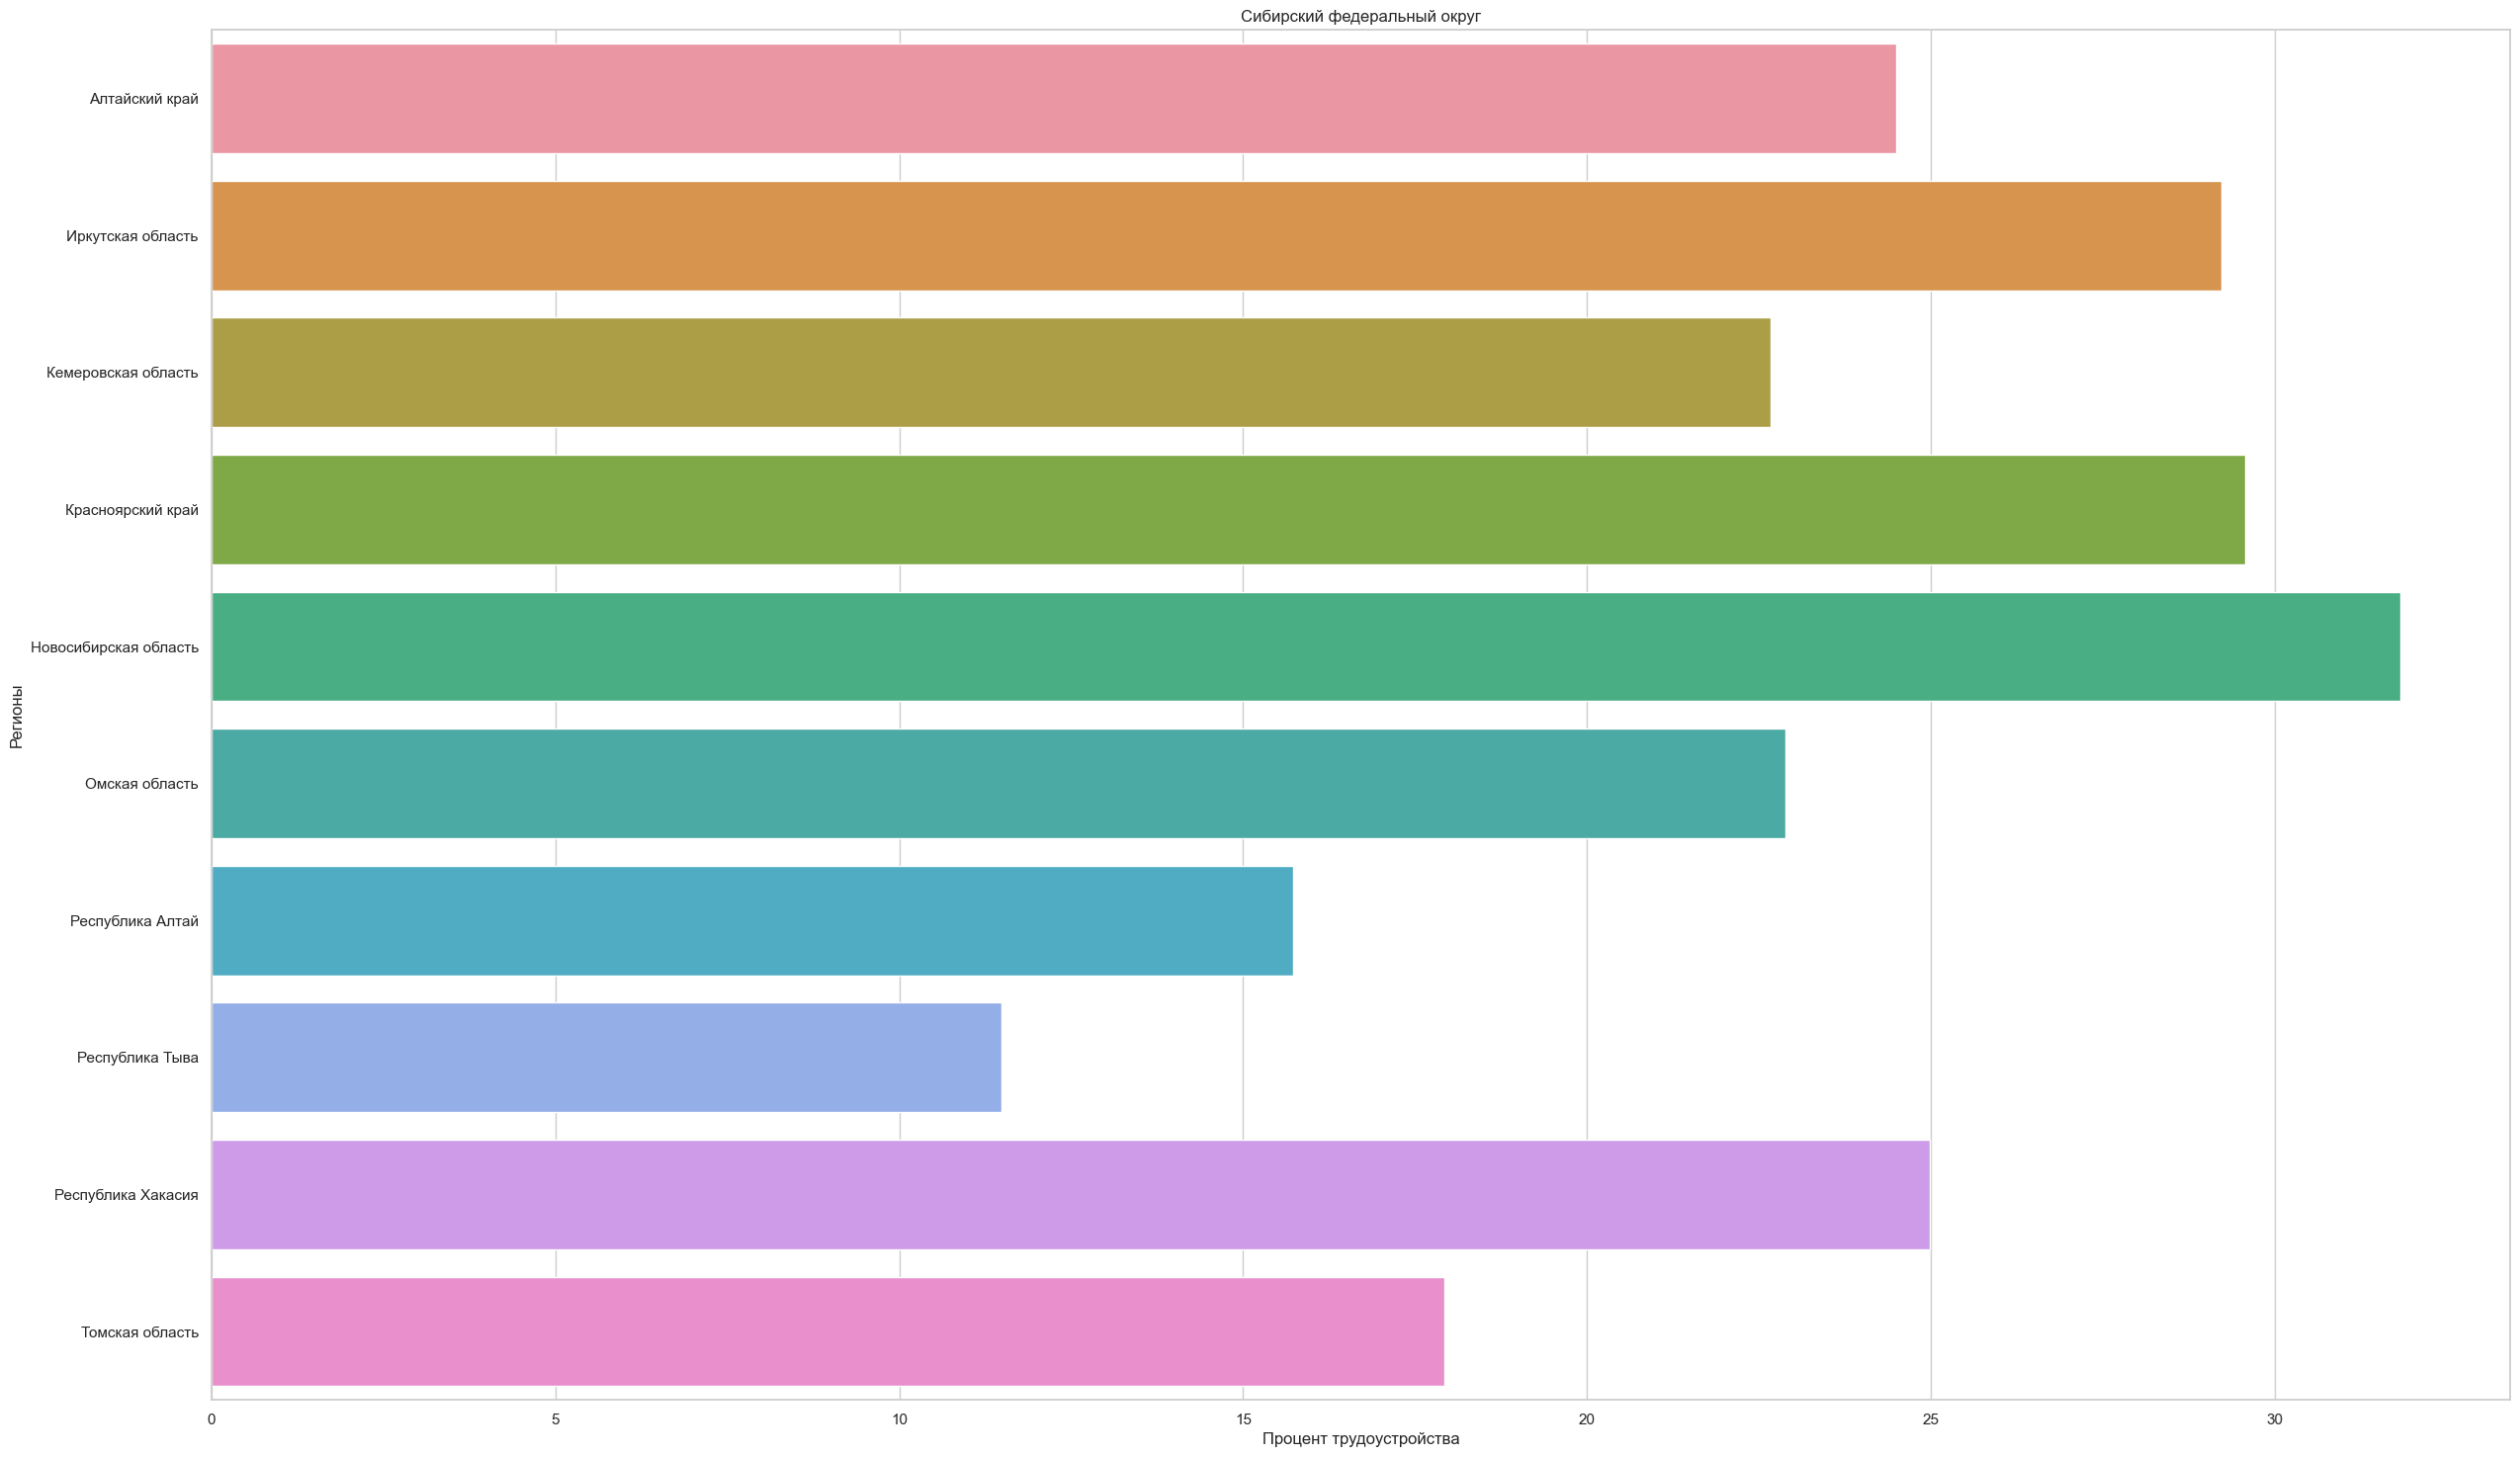

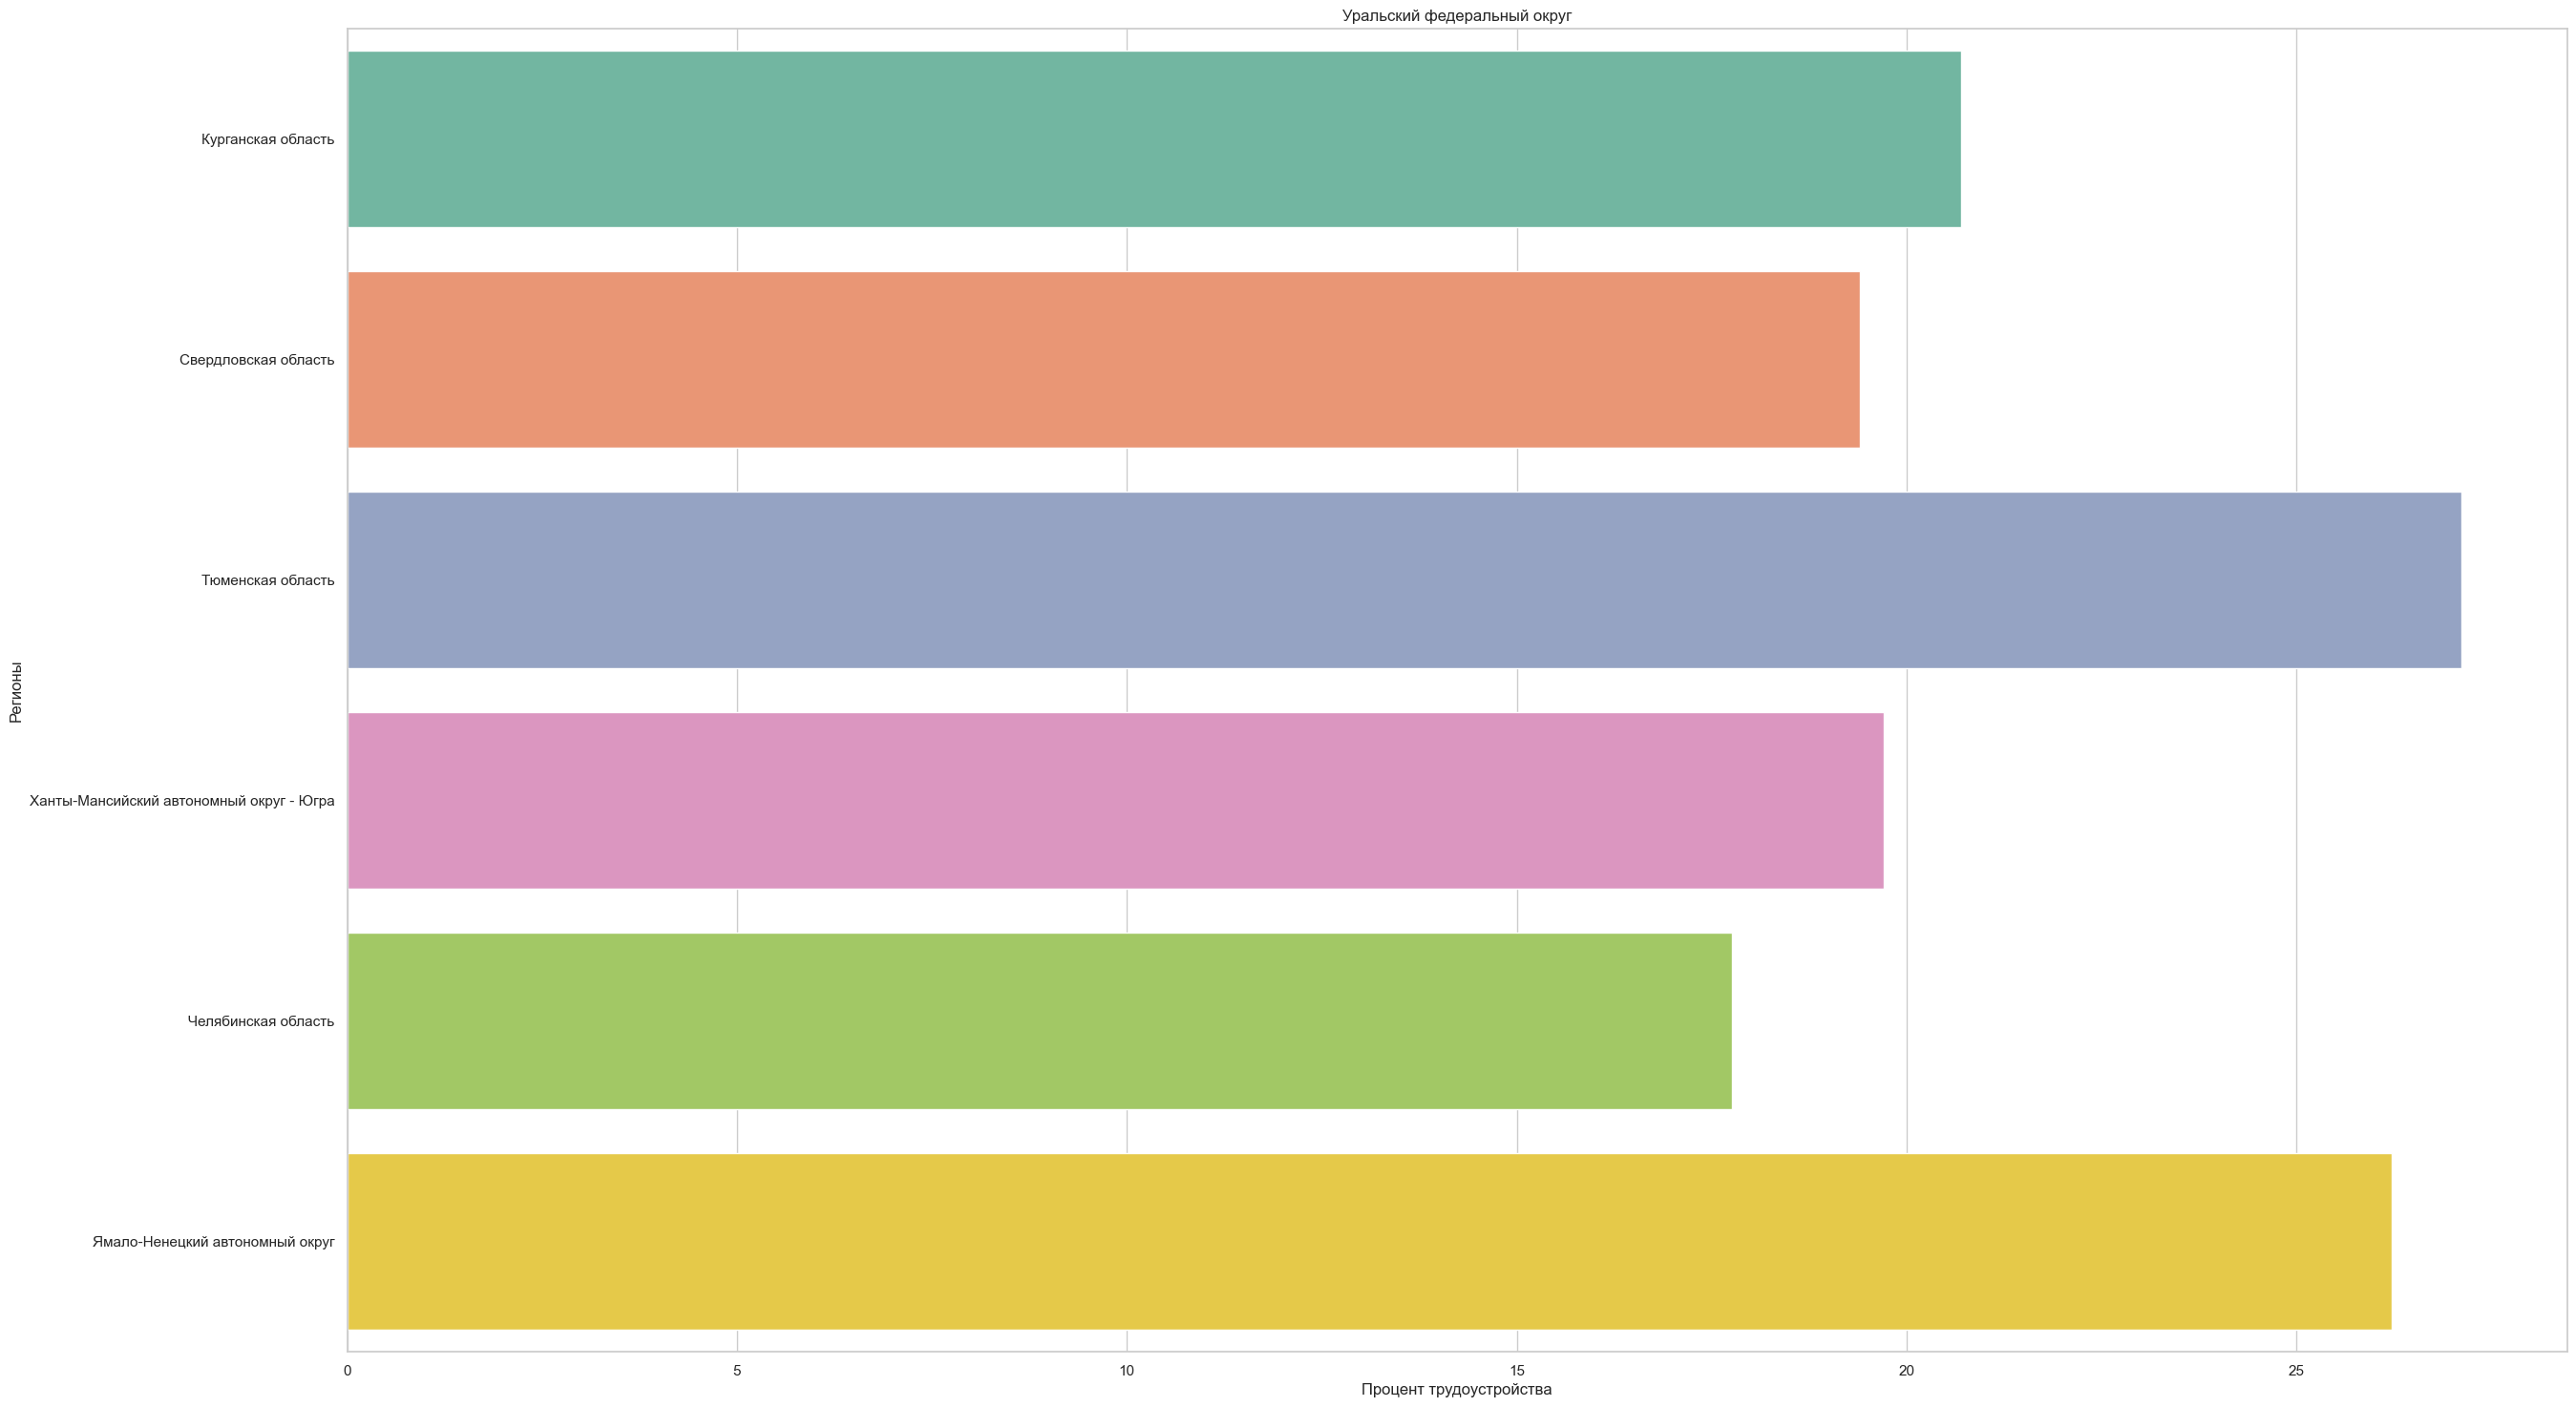

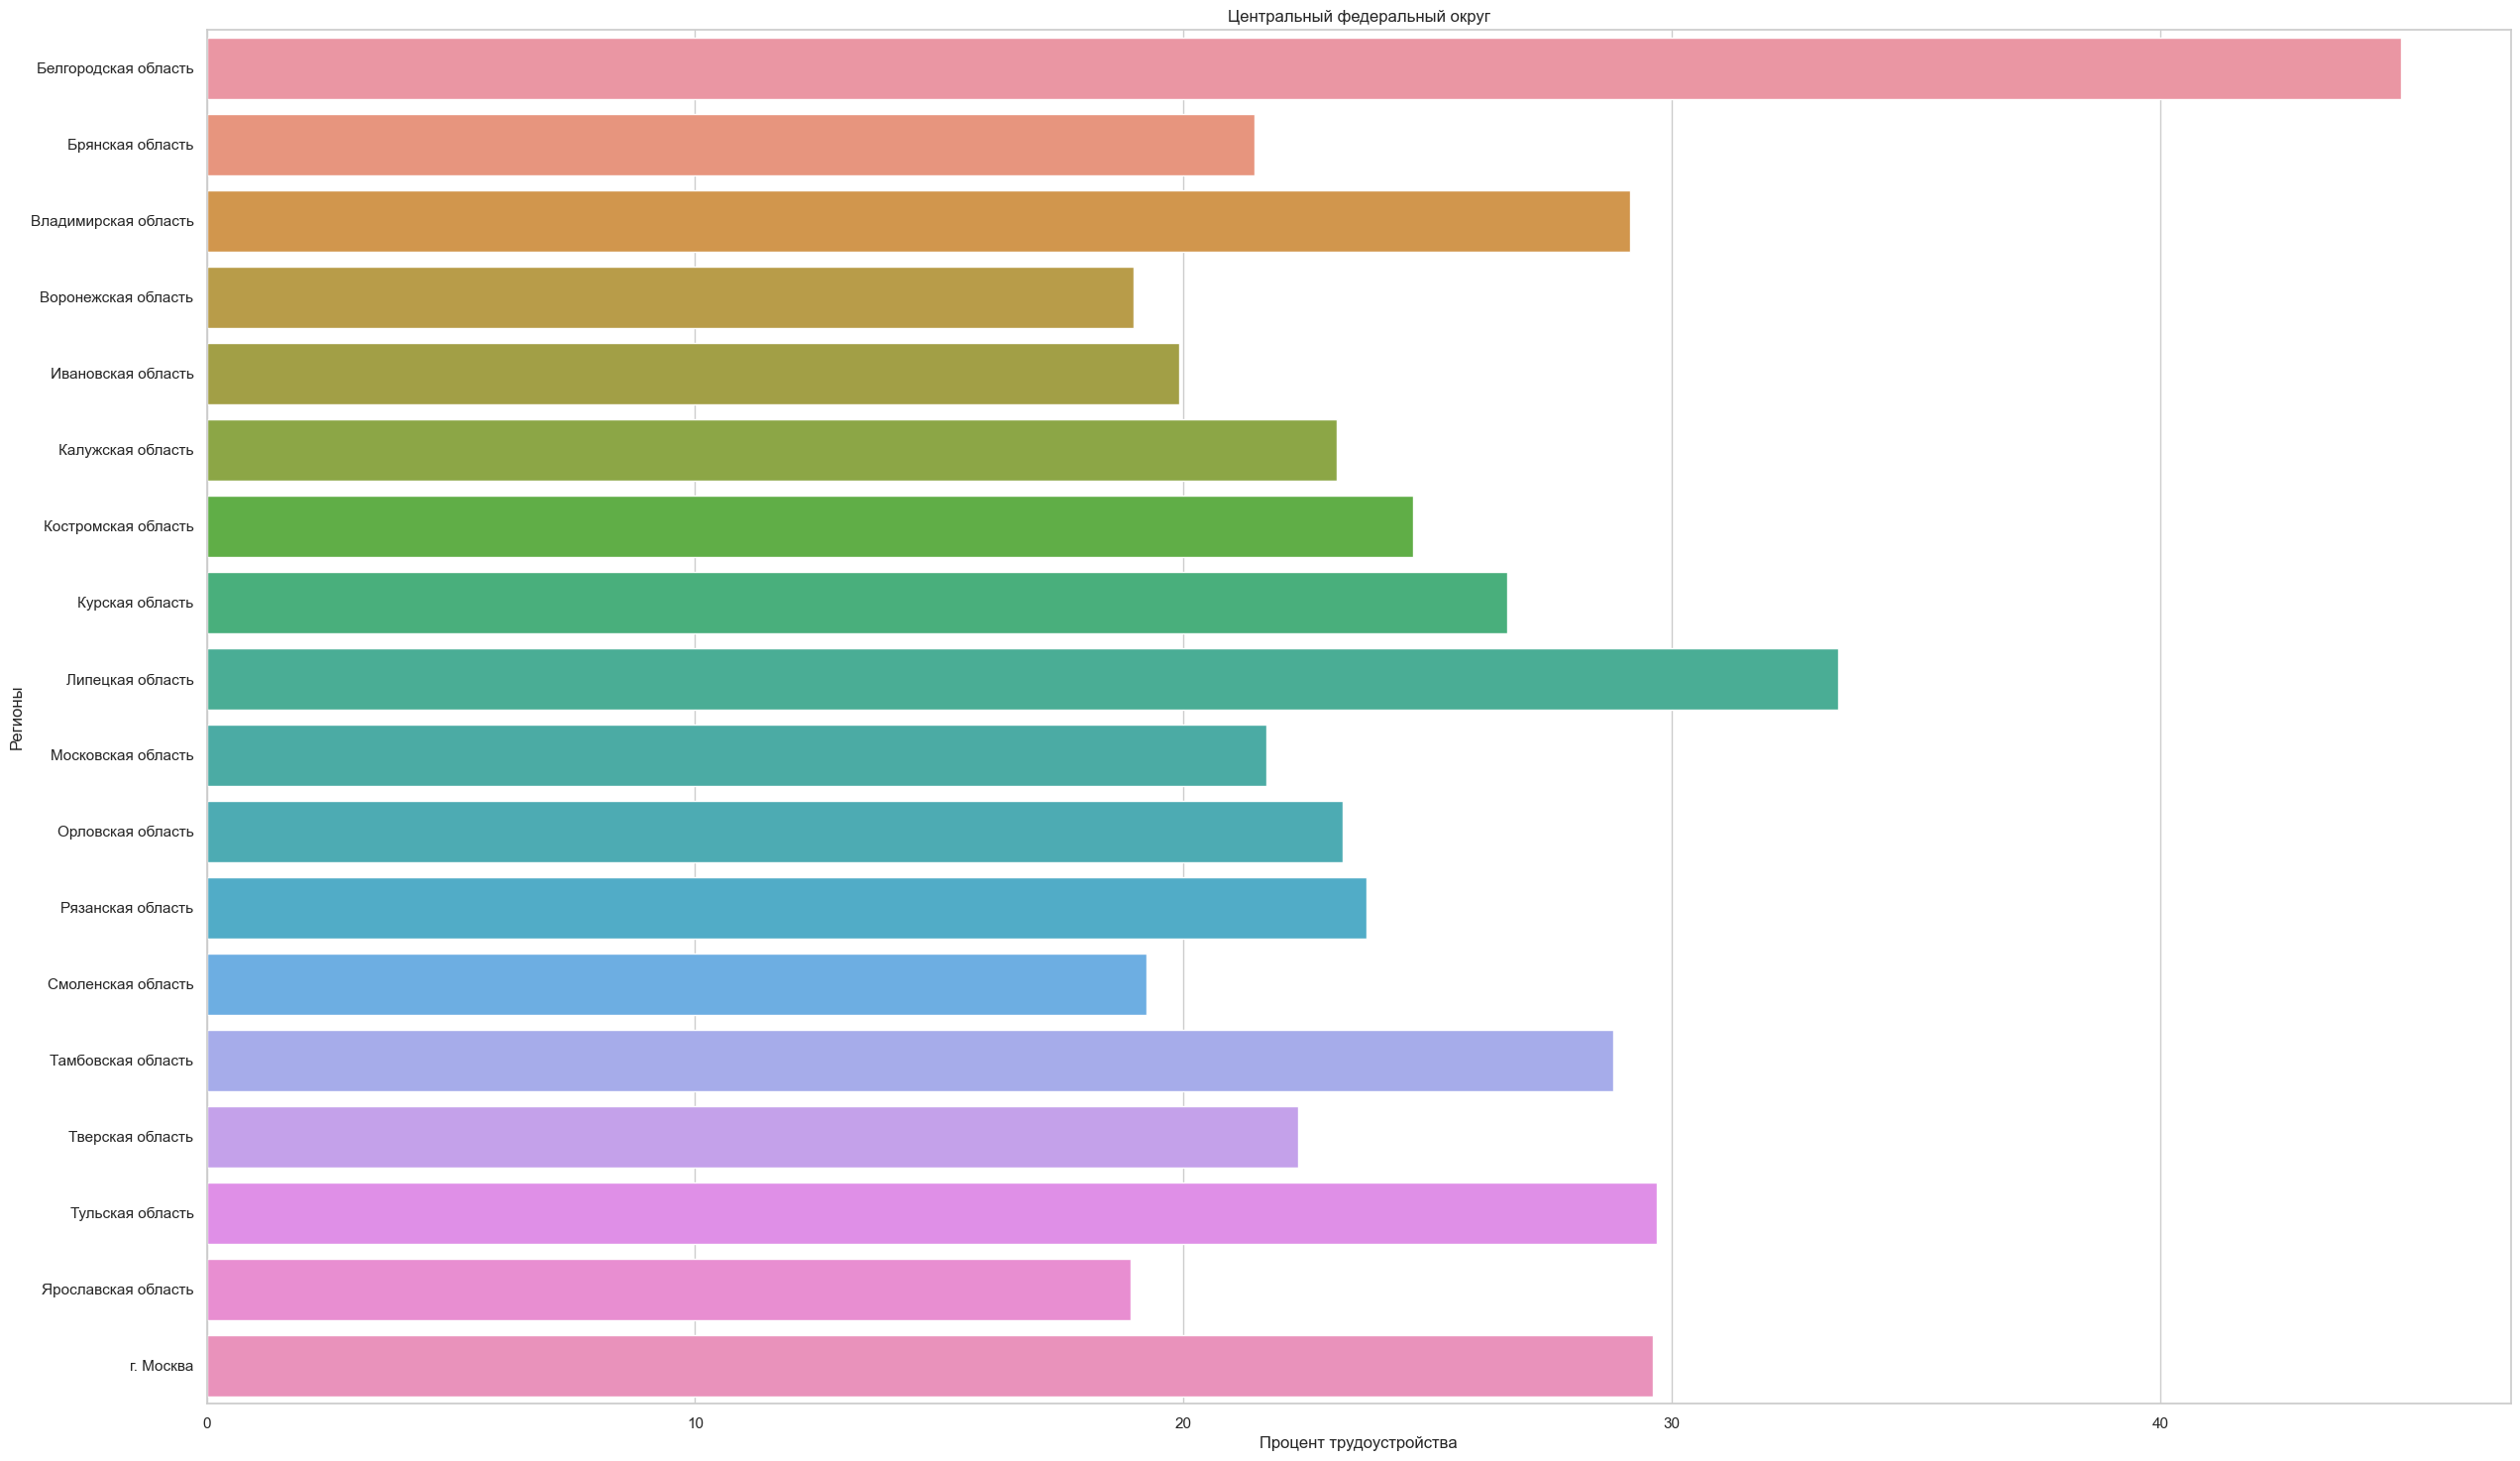

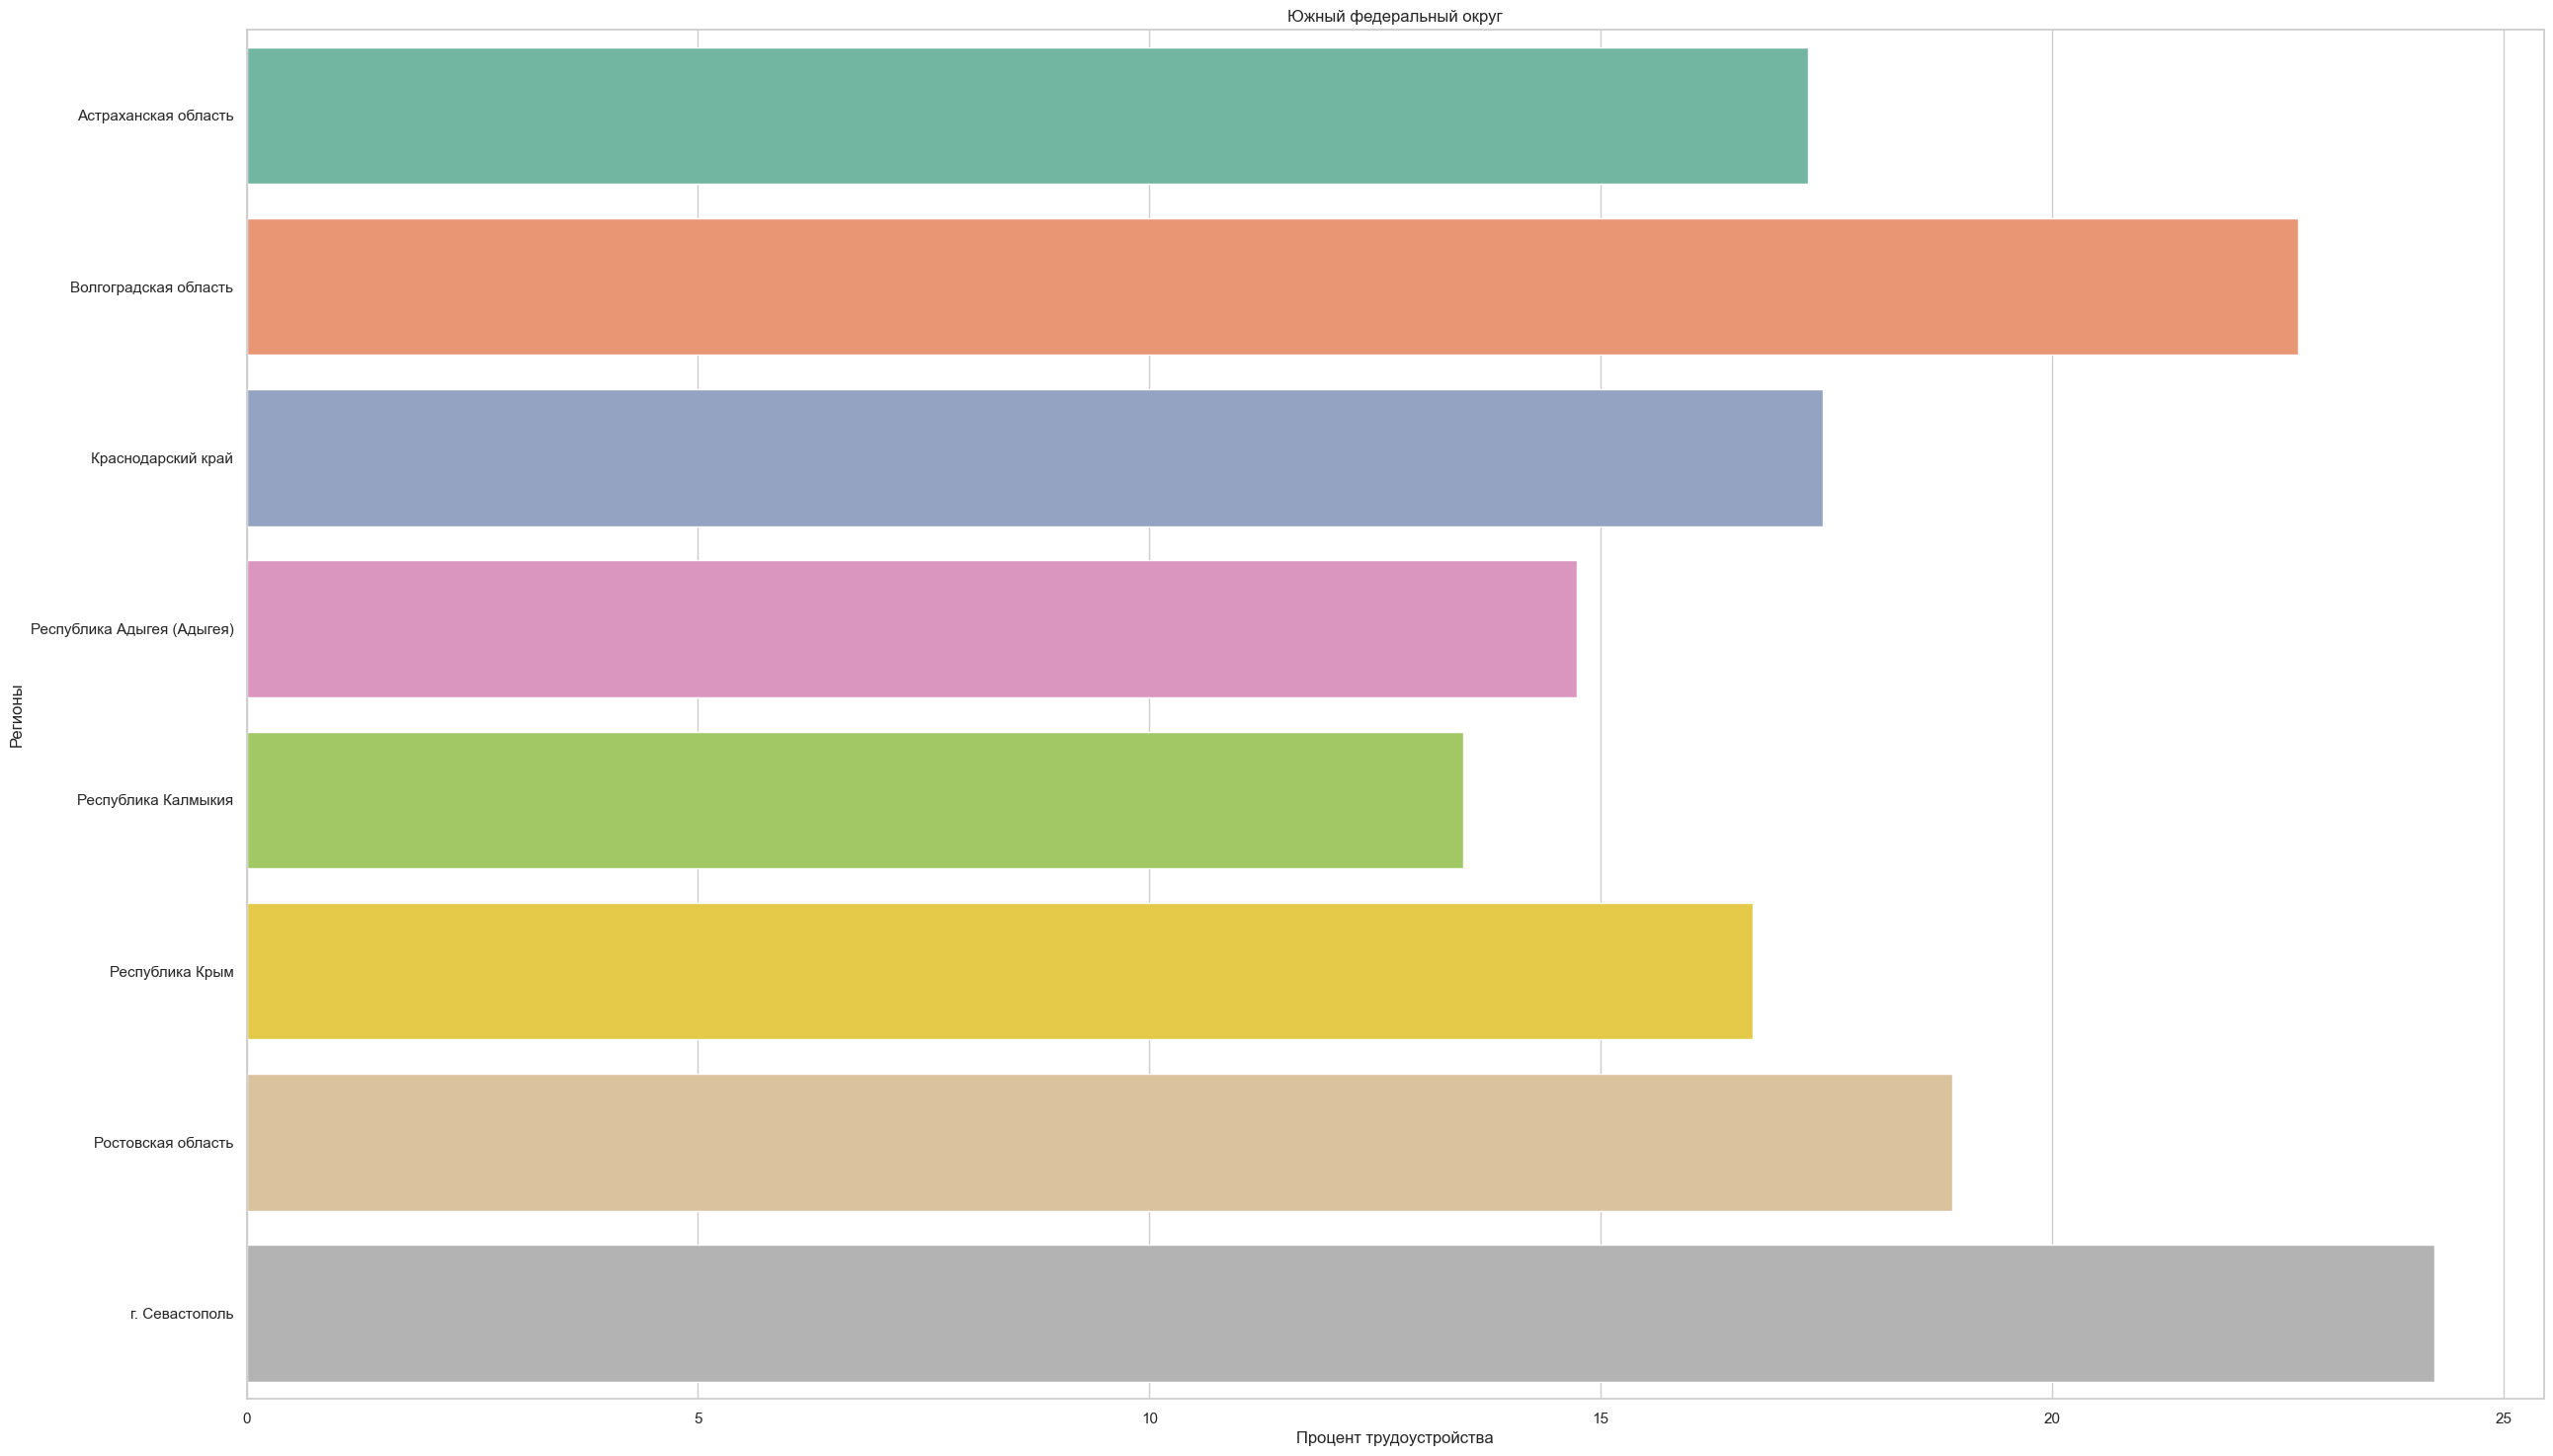

In [125]:
for i in df_1['district'].unique():
    district = df_1[df_1['district'] == i]
    empl_district = district[district['find_new_job']].pivot_table(index='region', aggfunc='sum', values='count').reset_index()
    empl = district.pivot_table(index='region', aggfunc='sum', values='count').reset_index()
    empl_district['perc'] = round(empl_district['count'] / empl['count'] * 100, 2)
    
    ax = sns.barplot(data=empl_district, x='perc', y='region').set(xlabel='Процент трудоустройства', ylabel='Регионы', title=i)
    plt.show()
# голые цифры вряд ли нормально изобразят % трудоустройства, поэтому лучше изобразить это в виде диграмм

<font color='slategrey'> <b> Лидеры по проценту трудоустройства по федеральным округам: </font>

<font color='slategrey'> <li>Дальневосточный федеральный округ: Сахалинская область</li></font>

<font color='slategrey'><li>Приволжский федеральный округ: Пензенская область </li></font>
    
<font color='slategrey'><li>Северо-Западный федеральный округ: Республика Карелия</li></font>
    
<font color='slategrey'><li>Северо-Кавказский федеральный округ: Чеченская Республика</li></font>
    
<font color='slategrey'><li>Сибирский федеральный округ: Новосибирская область</li></font>
    
<font color='slategrey'><li>Уральский федеральный округ: Тюменская область</li></font>
    
<font color='slategrey'><li>Центральный федеральный округ: Белгородская область</li></font>
    
<font color='slategrey'><li>Южный федеральный округ: г. Севастополь</li></font>